<p><img alt="Colaboratory logo" height="180x" src="https://play-lh.googleusercontent.com/shcWS-J-Q_7AiVAimx6yXFs02MgnHkh0o59R1aaHKgGzMqSRHpSRl3q0J4WCyTc05zGw" align="left" hspace="10px" width="20%" vspace="15px"></p>

<h1 align="center"> Prueba Técnica Profesional Banco Av Villas: Analista Estadístico.</h1>

<h3 align="center"> Autor: Manuel Alejandro Diaz Rubiano.</h3>

* datos faltantes: https://revistachilenadeanestesia.cl/datos-faltantes-missing-values/
* imputacion: https://sosa92.medium.com/imputaci%C3%B3n-de-valores-faltantes-en-r-c53f3ae6898b

### Metodologia CRISP-DM <a id='cell'></a>


El proceso estándar de la industria cruzada para la minería de datos (CRISP-DM) es un modelo de proceso que sirve como base para un proceso de ciencia de datos. Tiene seis fases secuenciales:

**Comprensión empresarial**: ¿Qué necesita la empresa?

**Comprensión de datos**: ¿Qué datos tenemos/necesitamos? ¿Está limpio?

**Preparación de datos**: ¿Cómo organizamos los datos para el modelado?

**Modelado** – ¿Qué técnicas de modelado debemos aplicar?

**Evaluación**: ¿Qué modelo cumple mejor con los objetivos comerciales?

**Implementación**: ¿cómo acceden las partes interesadas a los resultados?

<!---
![cycle](https://www.datascience-pm.com/wp-content/uploads/2021/02/CRISP-DM.png)
-->
<img src="https://www.datascience-pm.com/wp-content/uploads/2021/02/CRISP-DM.png" width="500">

## Comprensión Empresarial. <a id='cell1'></a>


El objetivo principal de este proyecto es desarrollar un modelo de aprendizaje automático que pueda predecir la probabilidad de incumplimiento de un cliente. Esta tarea es crucial para la gestión de riesgos y la toma de decisiones en el ámbito financiero, ya que permite a las instituciones anticipar y mitigar posibles pérdidas debidas a incumplimientos de pago.


El problema a abordar es un caso de clasificación binaria en el ámbito del crédito y riesgo financiero. Utilizando la base de datos proporcionada ("MDT_prueba.csv"), el modelo debe ser capaz de estimar la probabilidad de que un cliente incurra en incumplimiento en un periodo de 12 meses después de la "cosecha" (entendida como el momento de otorgamiento del crédito o servicio financiero).

## Comprensión de los Datos/ Preparacion de Datos. <a id='cell2'></a>

La base de datos "MDT_prueba.csv" es el recurso principal para este proyecto. Contiene información detallada por cliente, que se utilizará para predecir la probabilidad de incumplimiento.

**Estructura de los Datos**
* Archivo: MDT_prueba.csv
* Variables: 100 variables en total.
* Variable Objetivo: BGI_max (binaria: 1 indica incumplimiento, 0 no incumplimiento).
* Variables Predictoras: 99 variables que pueden incluir datos demográficos, financieros, historial de crédito, comportamiento de pagos, entre otros.

### Importacion de Librerias y Lectura de los Datos

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [2]:
os.chdir("/content/drive/MyDrive/Prueba Banco AV Villas")

In [3]:
df = pd.read_csv("MDT_prueba.csv", sep=";")

Se puede observar un ejemplo de los datos con los que se estan tratando, en la parte inferior, asi como nombres de variables, y un ejemplo de los valores que tienen. En total, se tienen 102 variables, incluyendo la variable objetivo *BGI_max*

In [17]:
df.head()

,Id_Cliente,cosecha,BGI_max,flag_prod_sum,var_T3_T2_INSTALAMENTOS_deuda_sum_per_centralr,var_T3_T1_INSTALAMENTOS_deuda_sum_per_centralr,var_T3_T1_VIVIENDA_deuda_sum_per_centralr,var_T3_T1_INSTALAMENTOS_partic_deudas_sum_per_centralr,Trim_3_INSTALAMENTOS_avg_partic_deudas_centralr,Trim_2_TC_sum_cumplimiento_cuota_centralr,score_actual_alertas,Trim_1_TC_avg_deuda_centralr_smmlv,var_T3_T2_BCO_deuda_sum_per_centralr,avg_cumplimiento_cuota_trims_BCO_centralr,var_T3_T2_DAVIVIENDASA_cuota_esperada_sum_per_centralr,var_T2_T1_AVVILLAS_deuda_avg_per_centralr,Trim_3_OTROS_ENT_sum_cumplimiento_cuota_centralr,Trim_3_DAVIVIENDASA_avg_cumplimiento_cuota_centralr,Trim_3_BANCOLOMBIA_sum_cuota_esperada_centralr_smmlv,Trim_3_AVVILLAS_sum_cumplimiento_cuota_centralr,Trim_2_OTROS_ENT_sum_cumplimiento_cuota_centralr,Trim_2_DAVIVIENDASA_sum_cuota_esperada_centralr_smmlv,Trim_1_OTROS_ENT_sum_cumplimiento_cuota_centralr,Trim_1_OTROS_ENT_sum_cuota_esperada_centralr_smmlv,Trim_1_COLPATRIA_avg_cuota_esperada_centralr_smmlv,Trim_1_COLPATRIA_sum_partic_deudas_centralr,pi_interna_act_credivillas_max,Trim_1_BANCOLOMBIA_avg_cuota_esperada_centralr_smmlv,Trim_1_BANCOLOMBIA_sum_deuda_centralr_smmlv,var_T3_T1_A_deuda_avg_per_centralr,var_T2_T1_A_partic_deudas_sum_per_centralr,var_T3_T2_partic_deudas_sum_per_centralr,var_T3_T1_partic_deudas_sum_per_centralr,Trim_1_sum_cumplimiento_cuota_centralr,var_T3_T1_num_ent_centralr,num_entidades_trim1_centralr,puntaje_centralr,balma_centralr,ratio_saldo_cupo_centralr,valor_mora_sum_centralr_smmlv,valor_inicial_cab_sum_centralr_smmlv,valor_cuota_sum_centralr_smmlv,rods_total_sum_centralr,numero_cuotas_mora_sum_centralr,mora30_3meses_sum_centralr,flag_tdc_mejor_clasica_max_centralr,flag_pasivo_sum_centralr,flag_linea_vehiculo_sum_centralr,flag_aho_saldada_max_centralr,cubrimiento_garantia_avg_centralr,aperturas_9meses_activo_max_centralr,aperturas_6meses_activo_sum_centralr,antiguedad_activo_max_centralr,flag_edad_61_65_centralr,flag_edad_18_25_centralr,antiguedad_act_tdc_max,dias_mora_avg,dias_mora_credivillas_avg,pi_interna_act_tdc_max,plazo_credivillas_avg,plazo_remanente_act_vivienda_avg,plazo_remanente_act_consumo_max,plazo_remanente_credivillas_avg,plazo_remanente_consumo_avg,cuota_cal_act_sum_smmlv,flag_cierre_sum,flag_prod_max,flag_prod_libranzas_max,flag_prod_tdc_sum,flag_prod_vivienda_max,flag_rod_0_consumo_sum,sd_cap_peso_sobregiro_sum_smmlv,vinm_peso_act_tdc_sum_smmlv,vinm_peso_credivillas_sum_smmlv,flag_rod_1_consumo_sum_ult_6meses_sum,flag_rod_0_consumo_sum_ult_6meses_sum,flag_apertura_consumo_sum_ult_3meses_sum,flag_apertura_vivienda_sum_ult_12meses_sum,porc_amortizacion_vivienda_ult_6meses_avg,porc_amortizacion_credivillas_ult_3meses_avg,porc_deuda_credivillas_ult_12meses_avg,ltv_corte_ult_12meses_avg,uso_rotativos_tdc_ult_3meses_avg,flag_apertura_consumo_max_ult_9meses_max,flag_apertura_consumo_max_ult_6meses_max,flag_prod_act_max_ult_12meses_max,dias_mora_act_tdc_max_ult_6meses_max,valor_flag_cartera_credivillas_ult_12meses_avg_smmlv,flag_cartera_vivienda_ult_12meses_sum,valor_flag_cartera_vivienda_ult_12meses_max_smmlv,flag_cartera_credivillas_ult_12meses_max,vratio_fin8,proveedores_smmlv,flag_score_mejora_mejora_alertas,flag_score_mantiene_mejora_alertas,flag_score_mejora_mantiene_alertas,flag_score_mantiene_mantiene_alertas,flag_score_mejora_empeora_alertas,flag_score_empeora_mantiene_alertas,lag2_score_actual_alertas,lag1_score_actual_alertas,lag1_score_actual_alertas.1
0,1,201803,0,221,,,,,,,,,,,,,,,,,,,,,,,1,,,,,,,,,0,,,0.000000,0.0,,,0,0,0,0,0,0,0,,0,0,,0,0,,93.950226,85.851675,,44.15311005,,-68,-74.99043062,-72.5412844,6.056279489,0,1,1,0,1,0,,,0,0,0,0,0,,0.748365827,0.207917332,,,0,0,1,0,0.000000,0,0.00000,0,,,0,0,0,0,0,0,,,
1,2,201804,0,4,-0.08,-0.13,,-0.07,41.8,0,848,1.47073506,-0.03,100,,-0.02,,,,100,,,,,0,9.8,0.0583,,,-0.06,0,0,0,0,0,3,814,0.858130841,0.831392,0.0,13.69614025,0.588806029,0,0,0,0,0,0,0,0,1,2,22.33333333,0,0,,0.000000,0.000000,,51,,37,12.75,12.75,0.365188994,0,1,0,0,0,0,,,0,0,0,0

In [18]:
len(df.columns)

102

In [19]:
# Resumen estadístico de las variables numéricas
summary_statistics = df.describe()
summary_statistics

,Id_Cliente,cosecha,BGI_max,flag_prod_sum,num_entidades_trim1_centralr,ratio_saldo_cupo_centralr,valor_mora_sum_centralr_smmlv,rods_total_sum_centralr,numero_cuotas_mora_sum_centralr,mora30_3meses_sum_centralr,flag_tdc_mejor_clasica_max_centralr,flag_pasivo_sum_centralr,flag_linea_vehiculo_sum_centralr,flag_aho_saldada_max_centralr,aperturas_9meses_activo_max_centralr,aperturas_6meses_activo_sum_centralr,flag_edad_61_65_centralr,flag_edad_18_25_centralr,dias_mora_avg,dias_mora_credivillas_avg,flag_cierre_sum,flag_prod_max,flag_prod_libranzas_max,flag_prod_tdc_sum,flag_prod_vivienda_max,flag_rod_0_consumo_sum,flag_rod_1_consumo_sum_ult_6meses_sum,flag_rod_0_consumo_sum_ult_6meses_sum,flag_apertura_consumo_sum_ult_3meses_sum,flag_apertura_vivienda_sum_ult_12meses_sum,flag_apertura_consumo_max_ult_9meses_max,flag_apertura_consumo_max_ult_6meses_max,flag_prod_act_max_ult_12meses_max,dias_mora_act_tdc_max_ult_6meses_max,valor_flag_cartera_credivillas_ult_12meses_avg_smmlv,flag_cartera_vivienda_ult_12meses_sum,valor_flag_cartera_vivienda_ult_12meses_max_smmlv,flag_cartera_credivillas_ult_12meses_max,flag_score_mejora_mejora_alertas,flag_score_mantiene_mejora_alertas,flag_score_mejora_mantiene_alertas,flag_score_mantiene_mantiene_alertas,flag_score_mejora_empeora_alertas,flag_score_empeora_mantiene_alertas
count,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.0,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.00000,23591.000000,23591.00000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000
mean,11796.000000,201806.669069,0.032300,2.774914,1.837353,0.546511,0.009693,0.020940,0.031919,0.012250,0.348819,1.371921,0.072740,0.016277,0.666398,0.982748,0.038786,0.037641,0.305383,0.145576,0.042898,1.0,0.005002,1.188504,0.077911,0.023314,0.007249,0.164003,0.039761,0.01331,0.229410,0.11462,0.929592,1.545547,0.602385,0.058539,0.651097,0.054131,0.016956,0.063541,0.042092,0.775720,0.014751,0.008435
std,6810.279436,3.337009,0.176801,2.416988,1.178997,0.615075,0.175516,0.222291,0.607742,0.149814,0.476607,1.353074,0.304911,0.126543,0.471509,1.522976,0.193089,0.190332,2.356445,1.612451,0.216193,0.0,0.070549,0.937801,0.268037,0.169679,0.093846,0.522754,0.235895,0.11680,0.420462,0.31857,0.255839,5.925791,3.847764,0.240121,4.441652,0.226280,0.129108,0.243939,0.200804,0.417116,0.120559,0.091458
min,1.000000,201801.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5898.500000,201804.000000,0.000000,1.000000,1.000000,0.315235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,11796.000000,201807.000000,0.000000,2.000000,2.000000,0.593070,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,17693.500000,201809.000000,0.000000,4.000000,2.000000,0.789008,0.000000,0.000000,0.000000,0.000000,1.000

In [20]:
# Identificar los tipos de datos
data_types = df.dtypes
data_types

Id_Cliente                                         int64
cosecha                                            int64
BGI_max                                            int64
flag_prod_sum                                      int64
var_T3_T2_INSTALAMENTOS_deuda_sum_per_centralr    object
                                                   ...  
flag_score_mejora_empeora_alertas                  int64
flag_score_empeora_mantiene_alertas                int64
lag2_score_actual_alertas                         object
lag1_score_actual_alertas                         object
lag1_score_actual_alertas.1                       object
Length: 102, dtype: object

In [21]:
# cantidad de filas y columnas
df.shape

(23591, 102)

### Analisis de Completitud de los datos y tipo

Es importante, el poder comprender los datos, su completitud (si pueden contener muchos datos faltantes), asi como el tipo de datos (enteros, continuos, caracter, etc).

In [4]:
# Convertir todas las columnas a numérico, y los valores que no se puedan convertir se pasan a NA
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Se observa una gran cantidad de datos Nulos en ciertas columnas. Sabiendo que la base de datos tiene 23591 filas en total, las variables con 22343 valores Nulos son variables que no aportan casi nada al analisis.

En la parte inferior, se puede observar un grafico representando en amarillo los datos faltantes, y en morado los datos no faltantes

In [5]:
# Datos Nulos
df.isnull().sum().sort_values(ascending=False)

plazo_remanente_act_vivienda_avg             22343
porc_amortizacion_vivienda_ult_6meses_avg    22299
ltv_corte_ult_12meses_avg                    22246
sd_cap_peso_sobregiro_sum_smmlv              22052
vratio_fin8                                  20543
                                             ...  
flag_prod_max                                    0
flag_prod_libranzas_max                          0
flag_prod_tdc_sum                                0
flag_prod_vivienda_max                           0
aperturas_6meses_activo_sum_centralr             0
Length: 102, dtype: int64

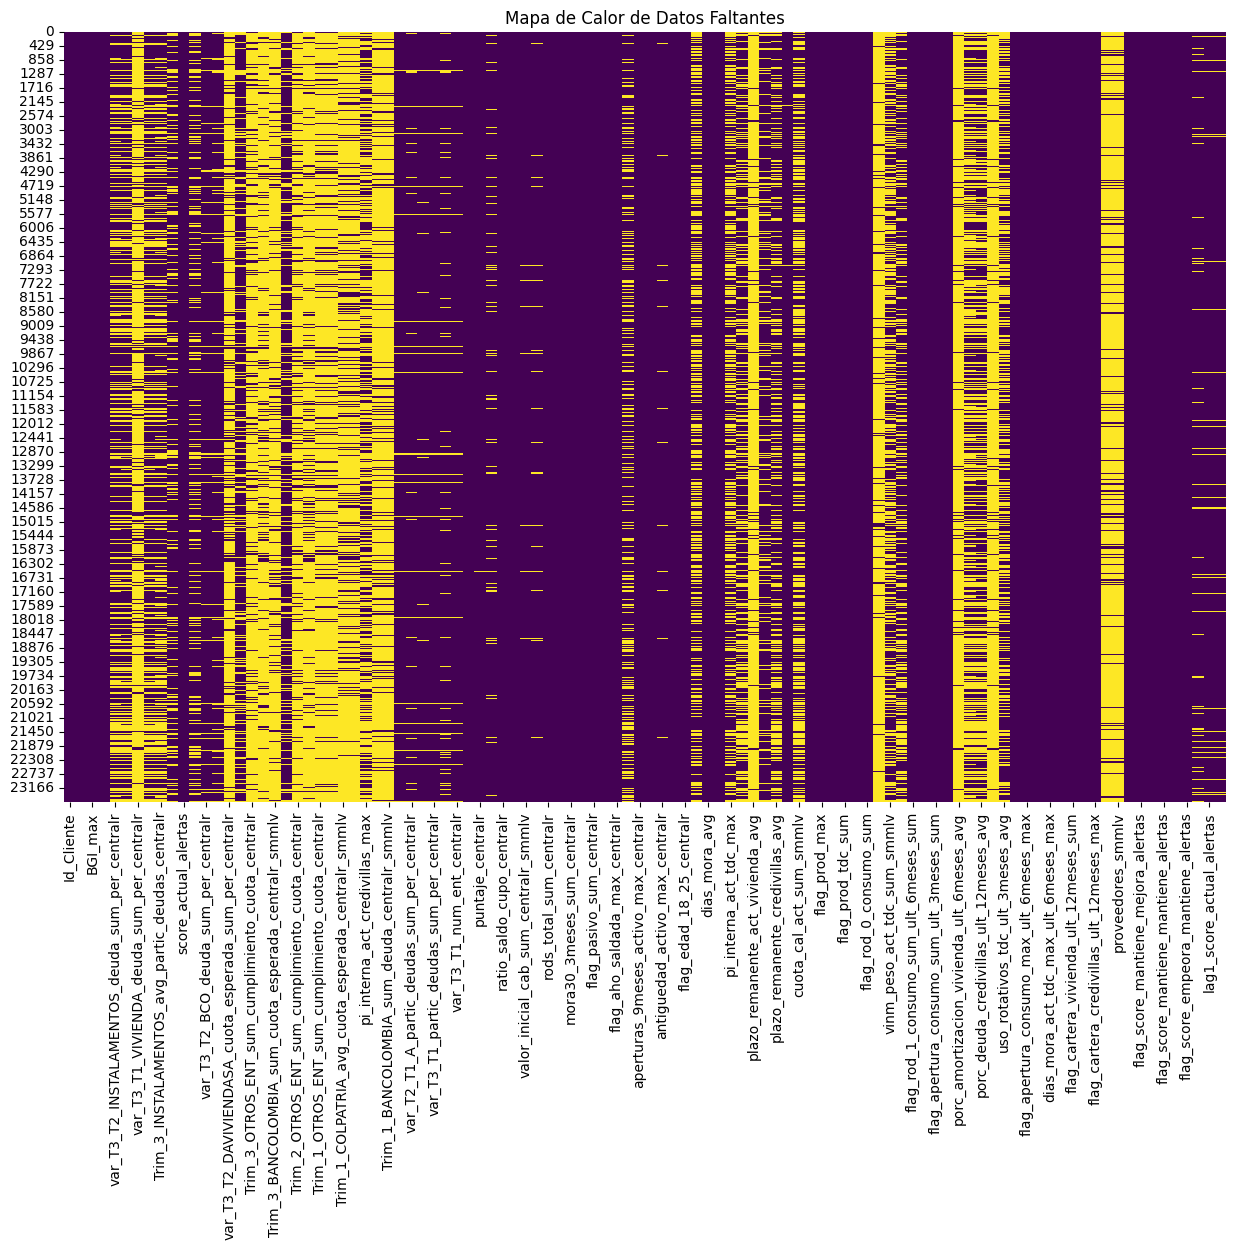

In [6]:
# Crear un mapa de calor para visualizar los datos faltantes
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Mostrar el gráfico
plt.title('Mapa de Calor de Datos Faltantes')
plt.show()

Existen varias formas de tratar con los datos Nulos. Dos de las formas mas famosas son: Eliminar los datos nulos o imputarlos.

En este caso, se procedera a eliminar aquellas columnas que tienen mas del 20% de los datos como nulos, y las que tienen menos del 20% de los datos nulos, se imputaran de la siguiente manera:
* los datos continuos se imputaran con la mediana
* los datos dicotomicos (por ejemplo 0 y 1), se creara un tercer codigo que sera "99" y denota faltante

In [7]:
# Calcular el porcentaje de valores faltantes por columna
percent_missing = df.isnull().mean() * 100

# Identificar las columnas con más del 40% de valores faltantes
columns_to_drop = percent_missing[percent_missing > 20].index
print("columnas a remover por alta precencia de NA: ", columns_to_drop)

print("Cantidad de Columnas: ", len(columns_to_drop))

columnas a remover por alta precencia de NA:  Index(['var_T3_T2_INSTALAMENTOS_deuda_sum_per_centralr',
       'var_T3_T1_INSTALAMENTOS_deuda_sum_per_centralr',
       'var_T3_T1_VIVIENDA_deuda_sum_per_centralr',
       'var_T3_T1_INSTALAMENTOS_partic_deudas_sum_per_centralr',
       'Trim_3_INSTALAMENTOS_avg_partic_deudas_centralr',
       'Trim_2_TC_sum_cumplimiento_cuota_centralr',
       'Trim_1_TC_avg_deuda_centralr_smmlv',
       'var_T3_T2_DAVIVIENDASA_cuota_esperada_sum_per_centralr',
       'Trim_3_OTROS_ENT_sum_cumplimiento_cuota_centralr',
       'Trim_3_DAVIVIENDASA_avg_cumplimiento_cuota_centralr',
       'Trim_3_BANCOLOMBIA_sum_cuota_esperada_centralr_smmlv',
       'Trim_2_OTROS_ENT_sum_cumplimiento_cuota_centralr',
       'Trim_2_DAVIVIENDASA_sum_cuota_esperada_centralr_smmlv',
       'Trim_1_OTROS_ENT_sum_cumplimiento_cuota_centralr',
       'Trim_1_OTROS_ENT_sum_cuota_esperada_centralr_smmlv',
       'Trim_1_COLPATRIA_avg_cuota_esperada_centralr_smmlv',
       'Trim_1_

In [8]:
# Eliminar estas columnas
df.drop(columns=columns_to_drop, inplace=True)

In [9]:
df.shape

(23591, 65)

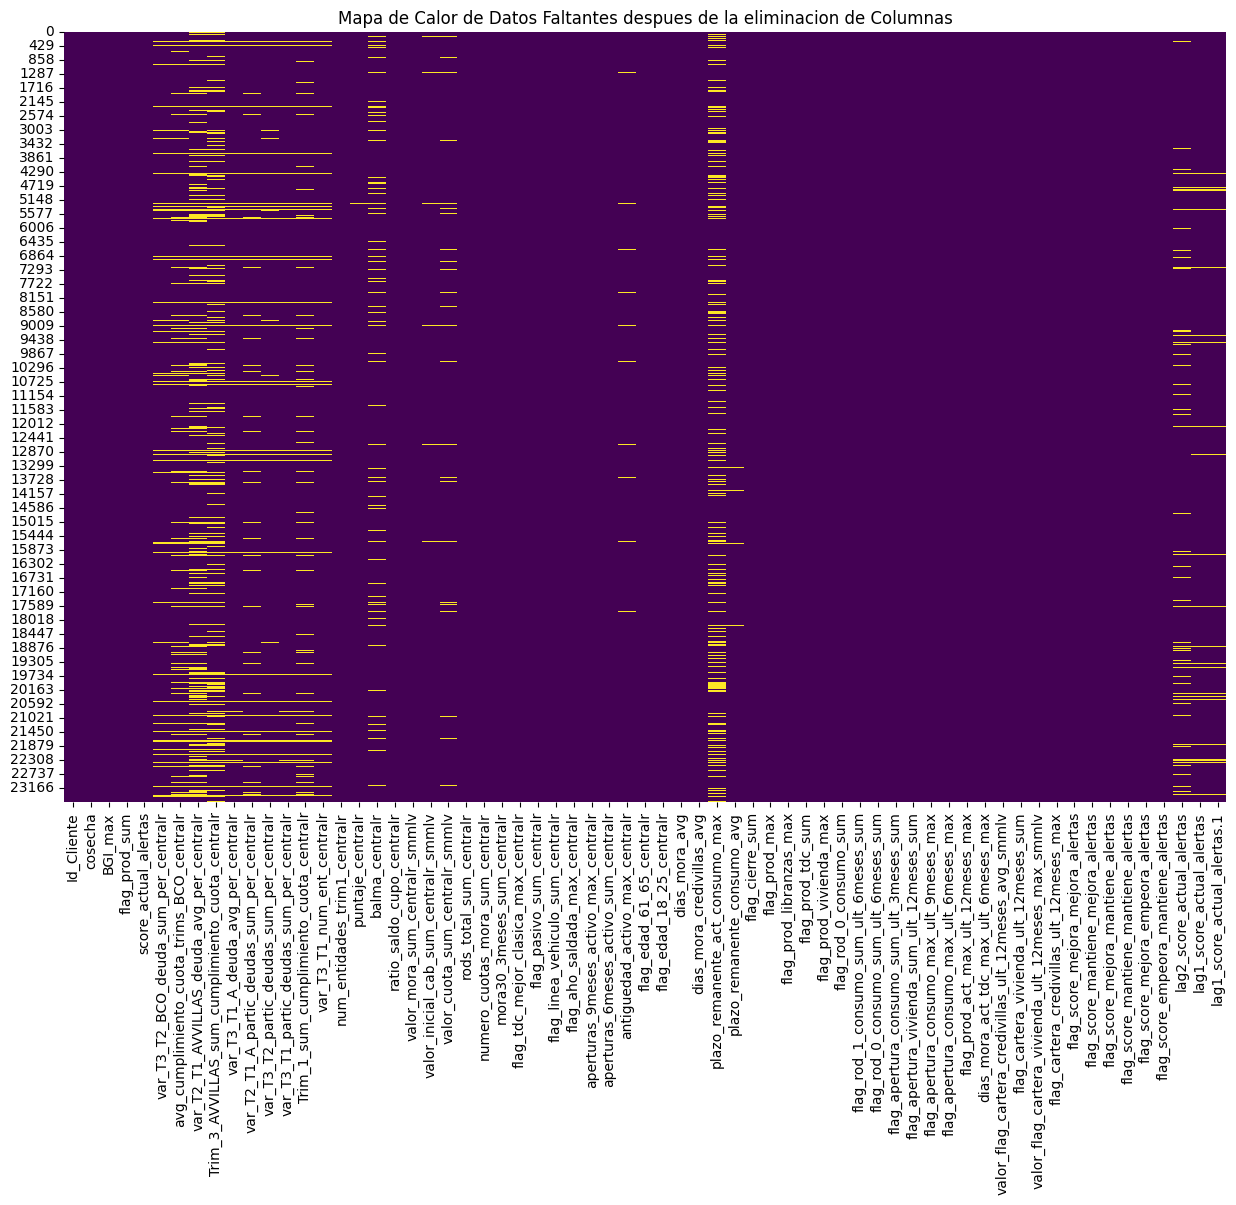

In [10]:
# Crear un mapa de calor para visualizar los datos faltantes
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Mostrar el gráfico
plt.title('Mapa de Calor de Datos Faltantes despues de la eliminacion de Columnas')
plt.show()

In [11]:
# Obtener tipos de datos y contar valores únicos
data_types = df.dtypes
unique_values = df.nunique()

# Determinar el tipo de cada columna
for col in df.columns:
    if unique_values[col] == 2:
        print(f"La columna '{col}' es dicotómica.")
    elif data_types[col] == 'int64' and unique_values[col] > 2:
        print(f"La columna '{col}' es entera.")
    elif data_types[col] == 'float64' and unique_values[col] > 2:
        print(f"La columna '{col}' es continua.")

La columna 'Id_Cliente' es entera.
La columna 'cosecha' es entera.
La columna 'BGI_max' es dicotómica.
La columna 'flag_prod_sum' es entera.
La columna 'score_actual_alertas' es continua.
La columna 'var_T3_T2_BCO_deuda_sum_per_centralr' es continua.
La columna 'avg_cumplimiento_cuota_trims_BCO_centralr' es continua.
La columna 'var_T2_T1_AVVILLAS_deuda_avg_per_centralr' es continua.
La columna 'Trim_3_AVVILLAS_sum_cumplimiento_cuota_centralr' es continua.
La columna 'var_T3_T1_A_deuda_avg_per_centralr' es continua.
La columna 'var_T2_T1_A_partic_deudas_sum_per_centralr' es continua.
La columna 'var_T3_T2_partic_deudas_sum_per_centralr' es continua.
La columna 'var_T3_T1_partic_deudas_sum_per_centralr' es continua.
La columna 'Trim_1_sum_cumplimiento_cuota_centralr' es continua.
La columna 'var_T3_T1_num_ent_centralr' es continua.
La columna 'num_entidades_trim1_centralr' es entera.
La columna 'puntaje_centralr' es continua.
La columna 'balma_centralr' es continua.
La columna 'ratio_sa

In [12]:
# Determinar el tipo de cada columna y realizar la imputación
for col in df.columns:
    unique_values = df[col].nunique()
    if unique_values == 2:  # Dicotómica
        df[col].fillna(value= 99, inplace=True)
    elif df[col].dtype == 'float64' or (df[col].dtype == 'int64' and unique_values > 2):  # Entera o Continua
        median_value = df[col].median()
        df[col].fillna(value=median_value, inplace=True)

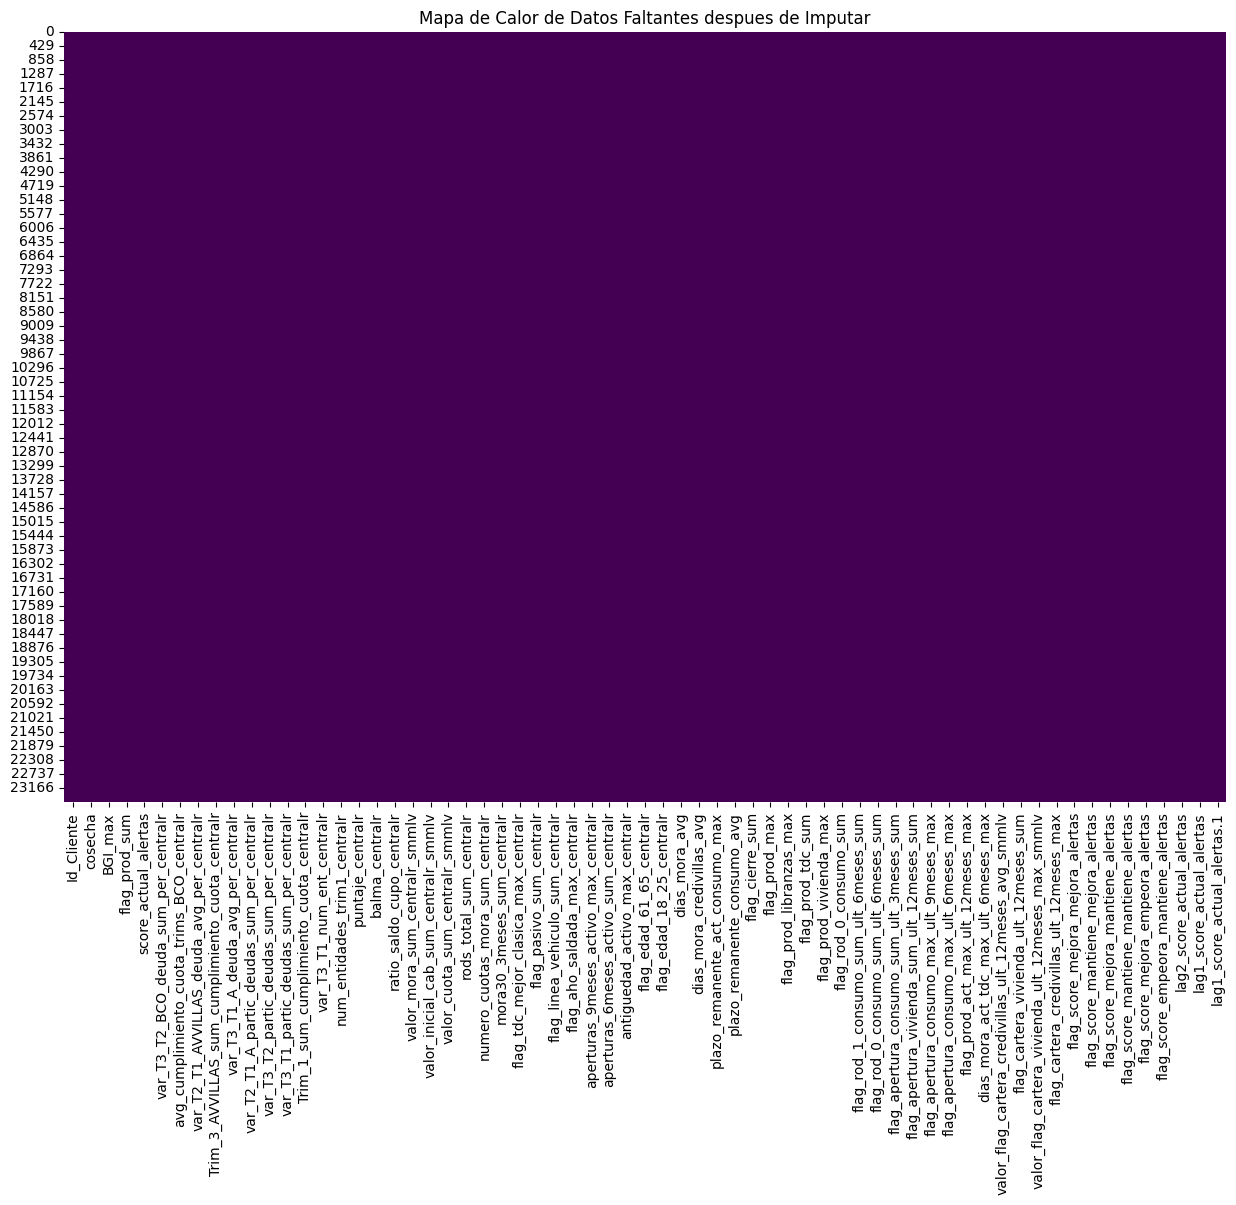

In [13]:
# Crear un mapa de calor para visualizar los datos faltantes
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Mostrar el gráfico
plt.title('Mapa de Calor de Datos Faltantes despues de Imputar')
plt.show()

In [14]:
df.shape

(23591, 65)

Se observa que ya se pudieron imputar los datos faltantes, de las variables mas completas que se tienen. Se observa tambien que de 102 variables iniciales, quedaron 65 variables que estamos seguros que estan completas

### Feature Importance: importancia de las variables.

Aunque fue posible poder descartar una gran cantidad de variables debido a sus datos faltantes, 65 variables siguen siendo un gran numero de variables. Por lo anterior, y sabiendo que nuestra base de datos resultante ya tienen una completitud deseada, se procede a analizar la importancia de las variables en relacion a la variable objetivo que tenemos *BGI_max*

**Matriz de Correlacion**

La matriz de correlación ofrece una visión clara de la relación lineal entre cada variable y el incumplimiento. Los valores de correlación, que oscilan entre -1 y 1, indican la fuerza y la dirección de la relación. Un valor cercano a 1 significa que hay una fuerte correlación positiva; es decir, cuando la variable predictora aumenta, también lo hace la probabilidad de incumplimiento. Por otro lado, un valor cercano a -1 indica una fuerte correlación negativa, lo que significa que un aumento en la variable predictora está asociado con una disminución en la probabilidad de incumplimiento.

Estos valores de correlación son fundamentales para el análisis de importancia de características.

In [15]:
# Calcular la correlación de todas las variables numéricas con 'BGI_max' (Variable_3)
correlations = df.corrwith(df['BGI_max']).drop('BGI_max')

In [16]:
# Obtener el valor absoluto de las correlaciones
abs_correlations = correlations.abs()

# Ordenar las correlaciones por valor absoluto
sorted_correlations = correlations.reindex(abs_correlations.sort_values(ascending=False).index)

# Imprimir las correlaciones ordenadas
print(sorted_correlations)

puntaje_centralr                             -0.110023
score_actual_alertas                         -0.084143
flag_rod_0_consumo_sum_ult_6meses_sum         0.079362
lag1_score_actual_alertas.1                  -0.060803
lag1_score_actual_alertas                    -0.060803
                                                ...   
var_T2_T1_AVVILLAS_deuda_avg_per_centralr    -0.001887
flag_prod_act_max_ult_12meses_max             0.001547
var_T3_T1_A_deuda_avg_per_centralr           -0.001339
var_T2_T1_A_partic_deudas_sum_per_centralr   -0.000927
flag_prod_max                                      NaN
Length: 64, dtype: float64


In [17]:
# Seleccionar las 10 variables numéricas con mayor correlación absoluta
top_10_numerical_vars = sorted_correlations.head(10).index

In [18]:
# Mostrar las 10 variables más importantes y sus correlaciones
top_10_numerical_vars_correlations = correlations[top_10_numerical_vars]
top_10_numerical_vars_correlations

puntaje_centralr                        -0.110023
score_actual_alertas                    -0.084143
flag_rod_0_consumo_sum_ult_6meses_sum    0.079362
lag1_score_actual_alertas.1             -0.060803
lag1_score_actual_alertas               -0.060803
lag2_score_actual_alertas               -0.060586
dias_mora_act_tdc_max_ult_6meses_max     0.059409
balma_centralr                           0.059254
flag_score_mantiene_mantiene_alertas    -0.054089
flag_rod_0_consumo_sum                   0.052615
dtype: float64

In [19]:
df[top_10_numerical_vars].describe()

,puntaje_centralr,score_actual_alertas,flag_rod_0_consumo_sum_ult_6meses_sum,lag1_score_actual_alertas.1,lag1_score_actual_alertas,lag2_score_actual_alertas,dias_mora_act_tdc_max_ult_6meses_max,balma_centralr,flag_score_mantiene_mantiene_alertas,flag_rod_0_consumo_sum
count,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000
mean,861.976940,851.444025,0.164003,834.574584,834.574584,822.711119,1.545547,0.559072,0.775720,0.023314
std,58.994883,53.959315,0.522754,81.968980,81.968980,107.139657,5.925791,0.279581,0.417116,0.169679
min,125.000000,303.000000,0.000000,8.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,840.000000,829.000000,0.000000,816.000000,816.000000,808.000000,0.000000,0.380185,1.000000,0.000000
50%,873.000000,863.000000,0.000000,853.000000,853.000000,850.000000,0.000000,0.602628,1.000000,0.000000
75%,900.000000,887.000000,0.000000,880.000000,880.000000,878.000000,0.000000,0.773431,1.000000,0.000000
max,963.000000,953.000000,7.000000,955.000000,955.000000,955.000000,102.000000,5.313514,1.000000,4.000000


**Random Forest**

El algoritmo de Random Forest determina la importancia de las características mediante un proceso que se basa en la construcción de múltiples árboles de decisión durante el entrenamiento del modelo. Cada árbol en el bosque se construye utilizando una selección aleatoria de características y muestras del conjunto de datos. La importancia de una característica se mide observando cuánto contribuye a mejorar la precisión de las predicciones en cada árbol.

Cuando un árbol de decisión se divide en un nodo, se selecciona una característica que resulta en la mayor disminución de la impureza, que generalmente se mide por el índice Gini o la entropía en clasificación. La importancia de una característica se calcula sumando la disminución de la impureza que aporta en todos los árboles del bosque y luego promediando este total. Así, las características que, en promedio, contribuyen más a reducir la impureza son consideradas más importantes.

El algoritmo clasifica estas importancias en orden descendente, permitiendo identificar cuáles son las variables más relevantes para la predicción. Este ranking de importancia es crucial para entender qué variables tienen el mayor impacto en la predicción del incumplimiento de un cliente, proporcionando insights valiosos para la toma de decisiones y la mejora del modelo.

In [20]:
# Separar características y variable objetivo
X = df.drop('BGI_max', axis=1)
y = df['BGI_max']


In [21]:
# Crear y entrenar el modelo

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=123)
model.fit(X, y)

RandomForestClassifier(random_state=123)

In [40]:
# importances[indices]
# X.columns[indices]

# pd.DataFrame({"variable":X.columns[indices], "importancia":importances[indices]}).head(60)

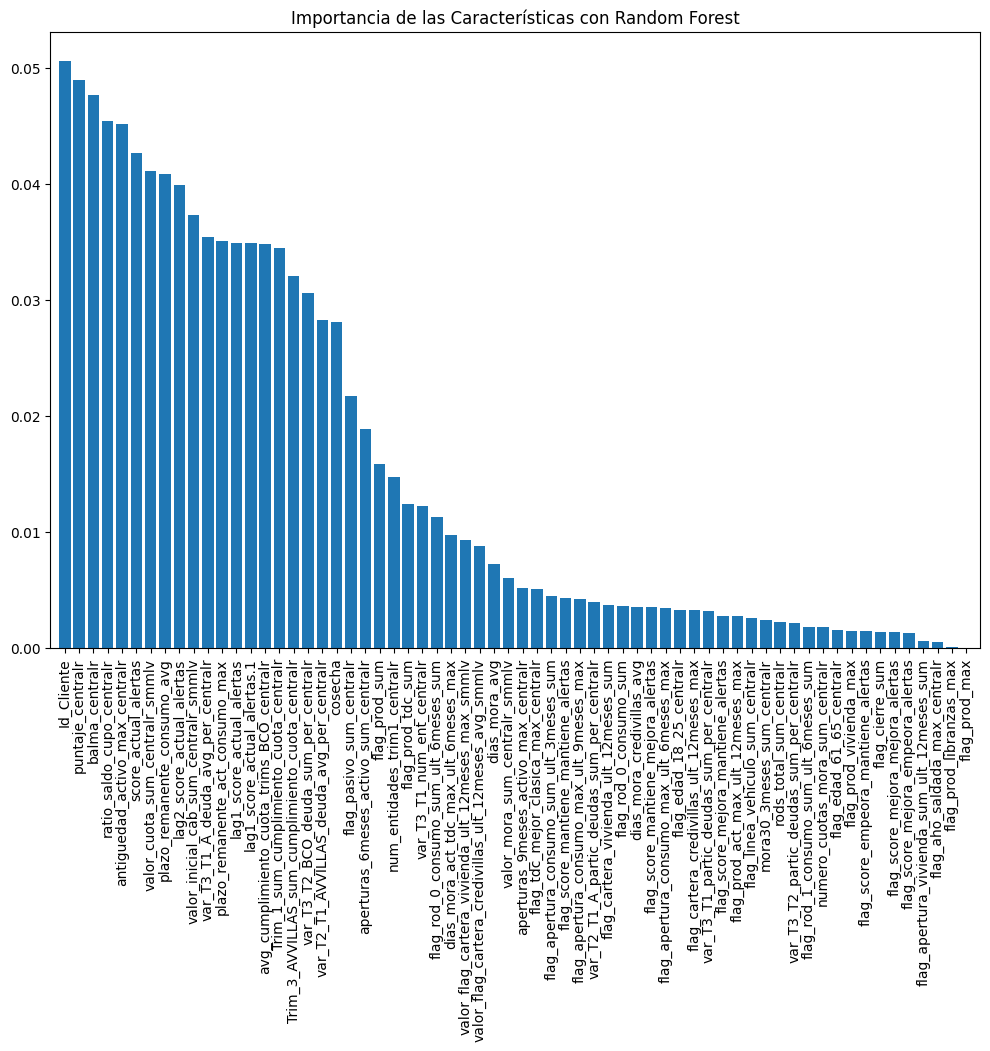

In [22]:

# Obtener importancia de las características
importances = model.feature_importances_

# Organizar las importancias de las características en orden descendente
indices = np.argsort(importances)[::-1]

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.title('Importancia de las Características con Random Forest')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

**Information Gain**

La técnica de Information Gain, o Ganancia de Información, se utiliza para determinar la importancia de las características en un conjunto de datos, especialmente en tareas de clasificación. Este método se basa en el concepto de entropía, que en este contexto mide la cantidad de incertidumbre o impureza en un conjunto de datos.

Cuando se utiliza la función mutual_info_classif de sklearn.feature_selection, el algoritmo evalúa cada característica individualmente para determinar cuánta información aporta sobre la variable objetivo. En términos prácticos, calcula cuánto reduce la incertidumbre acerca de la variable objetivo (y) cada característica (X).


Este cálculo se realiza comparando la entropía de la variable objetivo antes y después de conocer la característica. La reducción en la entropía se considera la ganancia de información. Así, una característica que proporciona una gran cantidad de información única sobre la variable objetivo tendrá una alta ganancia de información.

In [23]:
X = df.drop('BGI_max', axis=1)
y = df['BGI_max']

In [24]:
from sklearn.feature_selection import mutual_info_classif
# Calculando la importancia de las características
importances = mutual_info_classif(X, y)

# Creando una Serie de Pandas para visualizar las importancias
feat_importances = pd.Series(importances, X.columns)


In [25]:
# pd.DataFrame(feat_importances.sort_values(ascending=False)).head(60).reset_index()

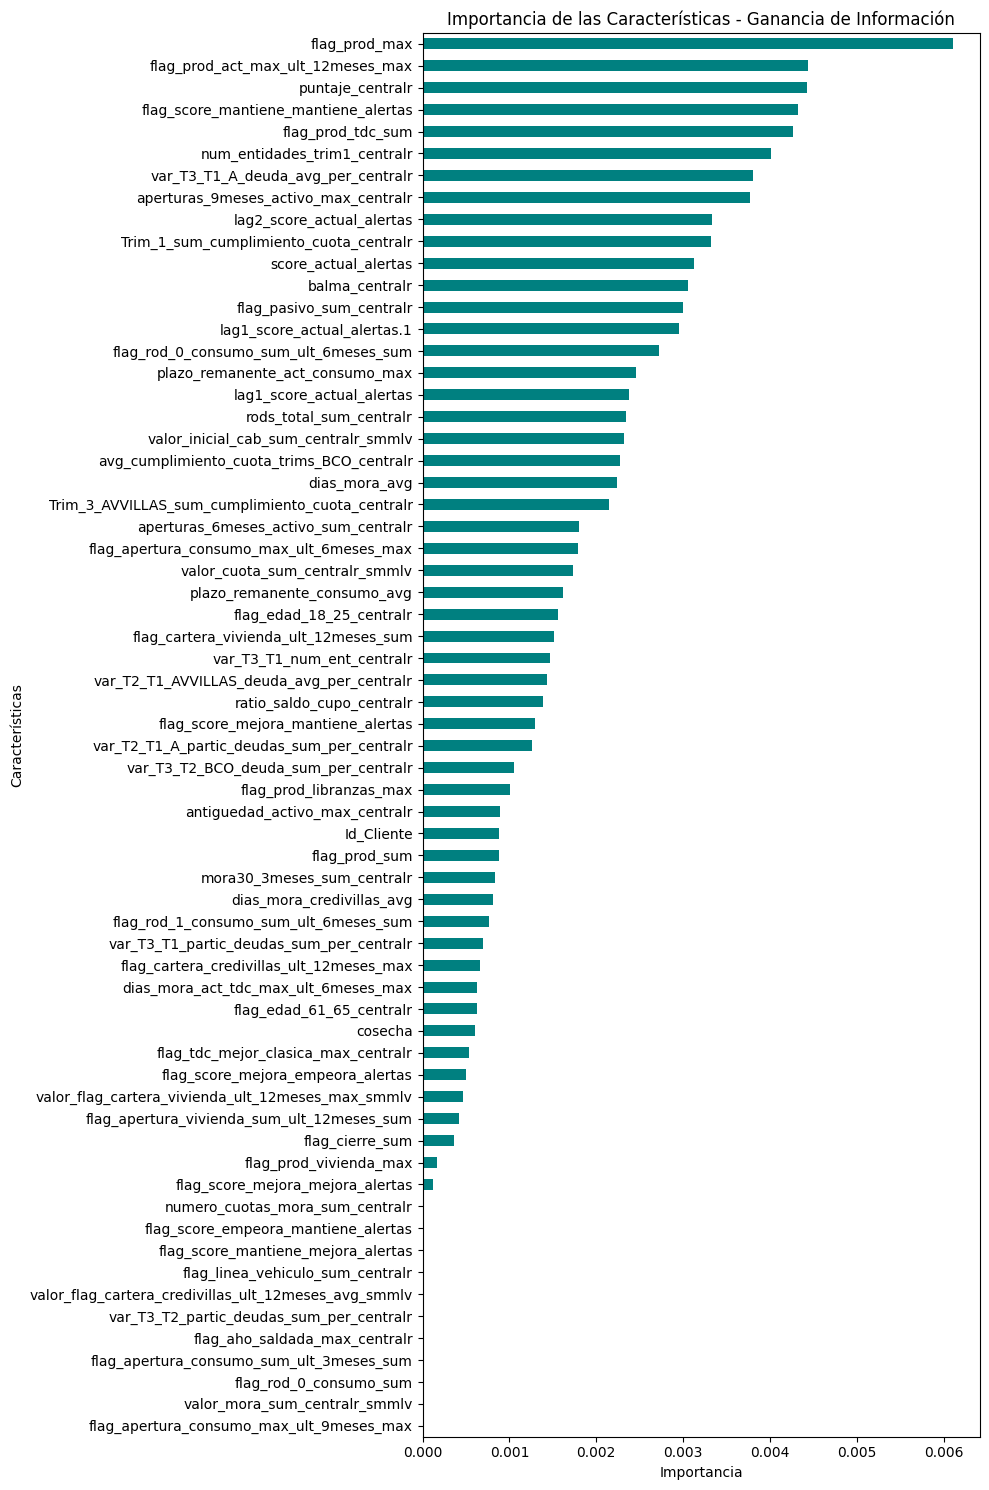

In [26]:
plt.figure(figsize=(10, 15))
feat_importances.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title('Importancia de las Características - Ganancia de Información')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

**Variables Seleccionadas**

Para entender por qué ciertas variables fueron seleccionadas como las más importantes en la predicción del incumplimiento de clientes, es esencial considerar los tres métodos utilizados: Matriz de Correlación, Random Forest Feature Importance y Information Gain.

1. Matriz de Correlación: Este método evalúa la relación lineal entre cada variable independiente y la variable dependiente. Las variables seleccionadas, como puntaje_centralr y score_actual_alertas, mostraron una correlación significativa, ya sea positiva o negativa, con la variable objetivo. Esto indica que cambios en estas variables están asociados con cambios en la probabilidad de incumplimiento.

2. Random Forest Feature Importance: Este enfoque se basa en el modelo de Random Forest, que es un conjunto de árboles de decisión. Las variables más importantes, como  puntaje_centralr, y balma_centralr, son aquellas que, en promedio, más contribuyen a mejorar la precisión de los árboles de decisión en el modelo. Estas variables son cruciales para dividir los datos de manera efectiva, lo que lleva a una mejor clasificación y predicción.

3. Information Gain: Este método mide cuánto reduce una variable la incertidumbre sobre la variable objetivo. Variables como flag_score_mantiene_mantiene_alertas y aperturas_9meses_activo_max_centralr tienen un alto Information Gain, lo que significa que proporcionan información valiosa que ayuda a distinguir entre diferentes clases de incumplimiento.

Las variables seleccionadas en común por estos métodos, como puntaje_centralr y score_actual_alertas, son particularmente robustas, ya que son reconocidas por diferentes técnicas como influyentes en la predicción del incumplimiento. Otras variables, aunque no seleccionadas por todos los métodos, aportan perspectivas únicas y complementarias, mejorando así la capacidad del modelo para capturar la complejidad del comportamiento de incumplimiento de los clientes.







In [27]:
variables_seleccionadas = [
    "puntaje_centralr",
    "score_actual_alertas",
    "flag_rod_0_consumo_sum_ult_6meses_sum",
    "lag1_score_actual_alertas",
    "dias_mora_act_tdc_max_ult_6meses_max",
    "balma_centralr",
    "flag_score_mantiene_mantiene_alertas",
    "aperturas_9meses_activo_max_centralr",
    "num_entidades_trim1_centralr",
    "flag_tdc_mejor_clasica_max_centralr",
    "flag_prod_sum",
    "Trim_3_AVVILLAS_sum_cumplimiento_cuota_centralr",
    "flag_rod_1_consumo_sum_ult_6meses_sum",
    "flag_edad_18_25_centralr",
    "flag_prod_vivienda_max",
    "flag_rod_0_consumo_sum",
    "flag_apertura_consumo_max_ult_9meses_max",
    "dias_mora_avg",
    "flag_apertura_consumo_max_ult_6meses_max",
    "avg_cumplimiento_cuota_trims_BCO_centralr",
    "flag_pasivo_sum_centralr",
    "aperturas_6meses_activo_sum_centralr",
    "dias_mora_credivillas_avg",
    "antiguedad_activo_max_centralr",
    "var_T3_T1_num_ent_centralr",
    "flag_prod_tdc_sum",
    "ratio_saldo_cupo_centralr",
    "valor_inicial_cab_sum_centralr_smmlv",
    "valor_cuota_sum_centralr_smmlv",
    "plazo_remanente_consumo_avg",
    "flag_cartera_vivienda_ult_12meses_sum",
    "BGI_max"
]


Se seleccionaron en total, 32 variables, que es un numero de variables mas reducido y que es mas facil lidiar, a diferencia de las 102 variables del inicio

In [47]:
# cantidad de variables seleccionadas
len(variables_seleccionadas)

32

In [28]:
df_final = df[variables_seleccionadas].copy()

In [29]:
df_final.head()

,puntaje_centralr,score_actual_alertas,flag_rod_0_consumo_sum_ult_6meses_sum,lag1_score_actual_alertas,dias_mora_act_tdc_max_ult_6meses_max,balma_centralr,flag_score_mantiene_mantiene_alertas,aperturas_9meses_activo_max_centralr,num_entidades_trim1_centralr,flag_tdc_mejor_clasica_max_centralr,flag_prod_sum,Trim_3_AVVILLAS_sum_cumplimiento_cuota_centralr,flag_rod_1_consumo_sum_ult_6meses_sum,flag_edad_18_25_centralr,flag_prod_vivienda_max,flag_rod_0_consumo_sum,flag_apertura_consumo_max_ult_9meses_max,dias_mora_avg,flag_apertura_consumo_max_ult_6meses_max,avg_cumplimiento_cuota_trims_BCO_centralr,flag_pasivo_sum_centralr,aperturas_6meses_activo_sum_centralr,dias_mora_credivillas_avg,antiguedad_activo_max_centralr,var_T3_T1_num_ent_centralr,flag_prod_tdc_sum,ratio_saldo_cupo_centralr,valor_inicial_cab_sum_centralr_smmlv,valor_cuota_sum_centralr_smmlv,plazo_remanente_consumo_avg,flag_cartera_vivienda_ult_12meses_sum,BGI_max
0,873.0,863.0,0,853.0,0,0.602628,0,0,0,0,221,110.735,0,0,1,0,0,93.950226,0,226.845000,0,0,85.851675,35.400000,0.0,0,0.000000,13.652620,0.582879,-72.541284,0,0
1,814.0,848.0,0,812.0,0,0.858131,1,1,3,0,4,100.000,0,0,0,0,0,0.000000,0,100.000000,0,2,0.000000,22.333333,0.0,0,0.831392,13.696140,0.588806,12.750000,1,0
2,903.0,874.0,0,857.0,0,0.525223,1,1,2,1,5,259.100,0,0,0,0,0,0.000000,0,219.700000,0,1,0.000000,39.566667,0.0,3,0.441859,27.251479,0.766728,18.800000,0,1
3,891.0,837.0,0,863.0,0,0.825155,1,1,3,1,10,200.000,0,0,1,0,1,0.000000,1,333.553333,7,3,0.000000,34.266667,0.0,2,0.849939,417.487795,8.522327,10647.111110,1,0
4,905.0,857.0,0,805.0,0,0.000000,0,1,2,0,1,267.500,0,0,0,0,0,0.000000,0,173.463333,1,2,0.000000,26.200000,0.5,1,0.362903,0.001280,0.139521,58.000000,0,0


### Analisis Descriptivos

**Datos Anomalos**

En la tabla descriptiva de la parte inferior se observan varios indicadores que sugieren la presencia de datos atípicos en distintas columnas. Primero, se identifican valores máximos extremadamente altos en comparación con los valores del tercer cuartil en columnas como dias_mora_act_tdc_max_ult_6meses_max, balma_centralr, flag_rod_0_consumo_sum_ult_6meses_sum, Trim_3_AVVILLAS_sum_cumplimiento_cuota_centralr, y dias_mora_avg. Estos valores máximos son desproporcionadamente altos en relación con la mayoría de los datos, lo que sugiere la presencia de outliers.

Se observan valores mínimos extremos en columnas como var_T3_T1_num_ent_centralr y plazo_remanente_consumo_avg, donde los valores mínimos son negativos y significativamente alejados de los valores del primer cuartil. Esto también indica la posible presencia de datos atípicos.

Por otro lado, se observa una gran dispersión en varias columnas, como se evidencia por las altas desviaciones estándar en comparación con los rangos intercuartílicos. Esto es particularmente notable en columnas como puntaje_centralr, score_actual_alertas, y lag1_score_actual_alertas, entre otras.

In [30]:
# Descripcion de las variables
df_final.describe()

,puntaje_centralr,score_actual_alertas,flag_rod_0_consumo_sum_ult_6meses_sum,lag1_score_actual_alertas,dias_mora_act_tdc_max_ult_6meses_max,balma_centralr,flag_score_mantiene_mantiene_alertas,aperturas_9meses_activo_max_centralr,num_entidades_trim1_centralr,flag_tdc_mejor_clasica_max_centralr,flag_prod_sum,Trim_3_AVVILLAS_sum_cumplimiento_cuota_centralr,flag_rod_1_consumo_sum_ult_6meses_sum,flag_edad_18_25_centralr,flag_prod_vivienda_max,flag_rod_0_consumo_sum,flag_apertura_consumo_max_ult_9meses_max,dias_mora_avg,flag_apertura_consumo_max_ult_6meses_max,avg_cumplimiento_cuota_trims_BCO_centralr,flag_pasivo_sum_centralr,aperturas_6meses_activo_sum_centralr,dias_mora_credivillas_avg,antiguedad_activo_max_centralr,var_T3_T1_num_ent_centralr,flag_prod_tdc_sum,ratio_saldo_cupo_centralr,valor_inicial_cab_sum_centralr_smmlv,valor_cuota_sum_centralr_smmlv,plazo_remanente_consumo_avg,flag_cartera_vivienda_ult_12meses_sum,BGI_max
count,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.00000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000,23591.000000
mean,861.976940,851.444025,0.164003,834.574584,1.545547,0.559072,0.775720,0.666398,1.837353,0.348819,2.774914,221.138512,0.007249,0.037641,0.077911,0.023314,0.229410,0.305383,0.11462,388.163127,1.371921,0.982748,0.145576,33.084425,0.105915,1.188504,0.546511,41.075295,1.201070,2496.083115,0.058539,0.032300
std,58.994883,53.959315,0.522754,81.968980,5.925791,0.279581,0.417116,0.471509,1.178997,0.476607,2.416988,276.025521,0.093846,0.190332,0.268037,0.169679,0.420462,2.356445,0.31857,412.016182,1.353074,1.522976,1.612451,9.424649,0.453172,0.937801,0.615075,85.571918,2.674346,11760.297618,0.240121,0.176801
min,125.000000,303.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.633333,-1.000000,0.000000,0.000000,0.000000,0.000000,-243.000000,0.000000,0.000000
25%,840.000000,829.000000,0.000000,816.000000,0.000000,0.380185,1.000000,0.000000,1.000000,0.000000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,112.735000,0.000000,0.000000,0.000000,28.066667,0.000000,1.000000,0.315235,5.285174,0.267523,9.000000,0.000000,0.000000
50%,873.000000,863.000000,0.000000,853.000000,0.000000,0.602628,1.000000,1.000000,2.000000,0.000000,2.000000,110.735000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,226.845000,1.000000,0.000000,0.000000,35.400000,0.000000,1.000000,0.593070,13.652620,0.582879,29.500000,0.000000,0.000000
75%,900.000000,887.000000,0.000000,880.000000,0.000000,0.773431,1.000000,1.000000,2.000000,1.000000,4.000000,200.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,480.780000,2.000000,1.000000,0.000000,39.800000,0.000000,2.000000,0.789008,38.656396,1.264013,47.666667,0.000000,0.000000
max,963.000000,953.000000,7.000000,955.000000,102.000000,5.313514,1.000000,1.000000,12.000000,1.000000,221.000000,2721.900000,3.000000,1.000000,1.000000,4.000000,1.000000,93.950226,1.00000,4307.073333,16.000000,50.000000,85.851675,48.900000,4.000000,8.000000,73.000000,3752.784669,226.936617,95784.000000,2.000000,1.000000


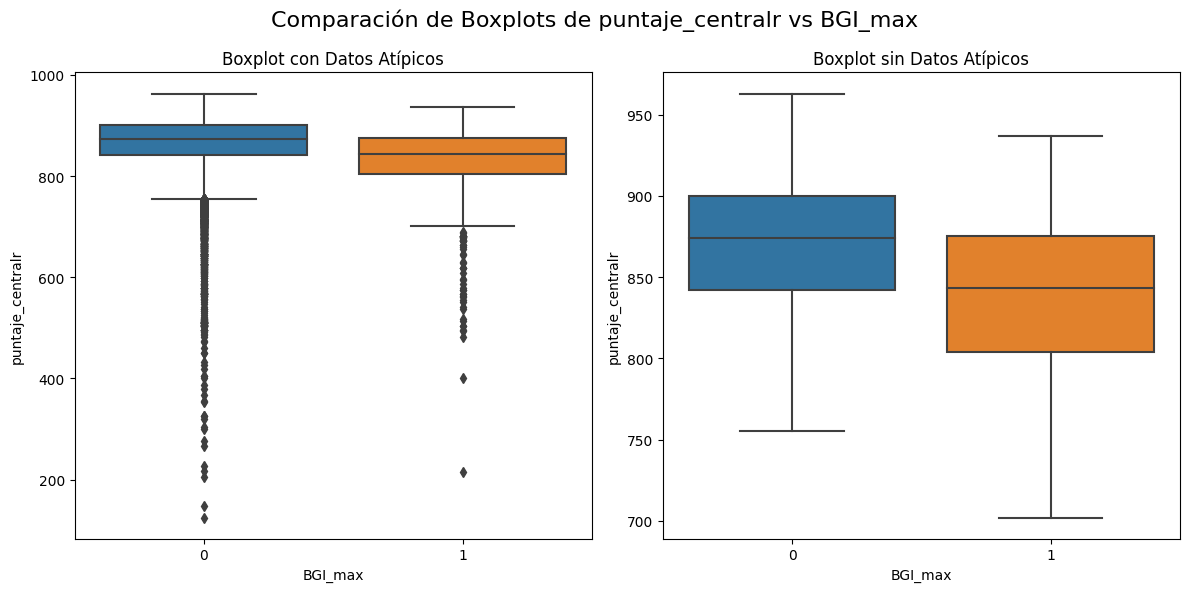

In [31]:
# Configura una figura con dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

fig.suptitle('Comparación de Boxplots de puntaje_centralr vs BGI_max', fontsize=16)

# Boxplot con datos atípicos
sns.boxplot(x='BGI_max', y='puntaje_centralr', data=df_final, ax=axes[0], showfliers=True)
axes[0].set_title('Boxplot con Datos Atípicos')

# Boxplot sin datos atípicos
sns.boxplot(x='BGI_max', y='puntaje_centralr', data=df_final, ax=axes[1], showfliers=False)
axes[1].set_title('Boxplot sin Datos Atípicos')

# Ajusta el layout para evitar superposición de títulos
plt.tight_layout()

# Muestra la figura
plt.show()


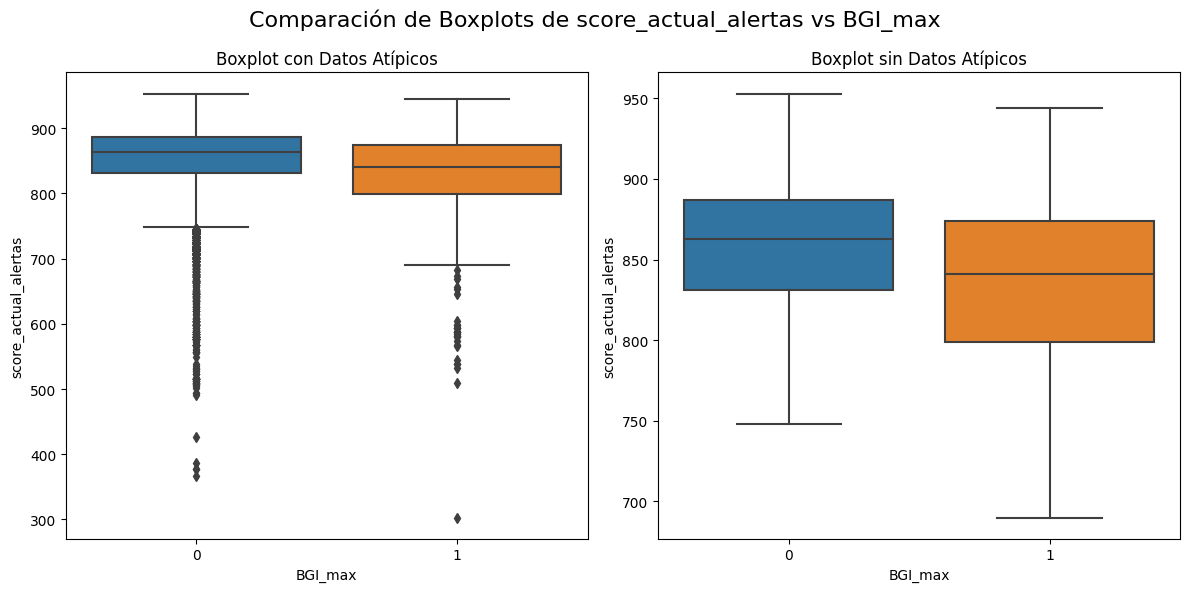

In [32]:
# Configura una figura con dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

fig.suptitle('Comparación de Boxplots de score_actual_alertas vs BGI_max', fontsize=16)

# Boxplot con datos atípicos
sns.boxplot(x='BGI_max', y='score_actual_alertas', data=df_final, ax=axes[0], showfliers=True)
axes[0].set_title('Boxplot con Datos Atípicos')

# Boxplot sin datos atípicos
sns.boxplot(x='BGI_max', y='score_actual_alertas', data=df_final, ax=axes[1], showfliers=False)
axes[1].set_title('Boxplot sin Datos Atípicos')

# Ajusta el layout para evitar superposición de títulos
plt.tight_layout()

# Muestra la figura
plt.show()

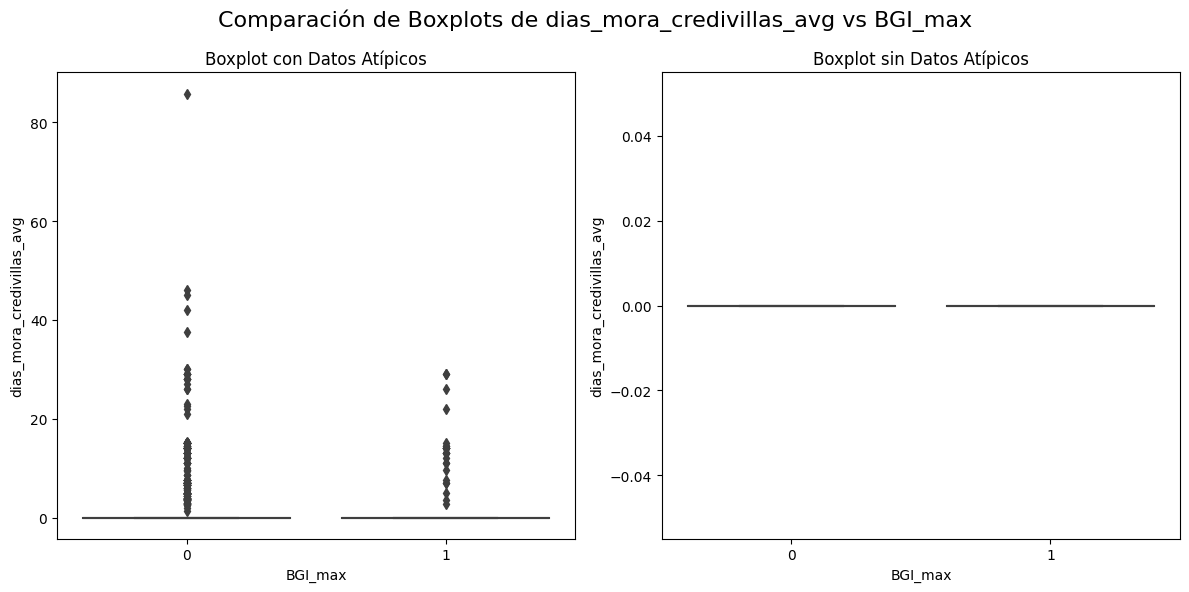

In [33]:
# dias_mora_credivillas_avg
# Configura una figura con dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

fig.suptitle('Comparación de Boxplots de dias_mora_credivillas_avg vs BGI_max', fontsize=16)

# Boxplot con datos atípicos
sns.boxplot(x='BGI_max', y='dias_mora_credivillas_avg', data=df_final, ax=axes[0], showfliers=True)
axes[0].set_title('Boxplot con Datos Atípicos')

# Boxplot sin datos atípicos
sns.boxplot(x='BGI_max', y='dias_mora_credivillas_avg', data=df_final, ax=axes[1], showfliers=False)
axes[1].set_title('Boxplot sin Datos Atípicos')

# Ajusta el layout para evitar superposición de títulos
plt.tight_layout()

# Muestra la figura
plt.show()

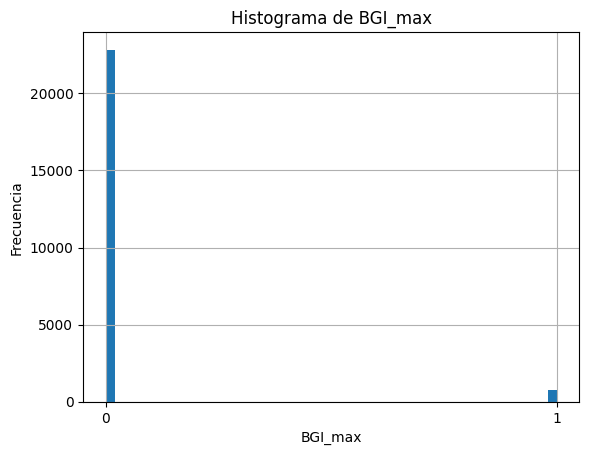

In [34]:
# Histograma de 'BGI_max'
df_final['BGI_max'].astype(str).hist(bins=50)
plt.title('Histograma de BGI_max')
plt.xlabel('BGI_max')
plt.ylabel('Frecuencia')
plt.show()



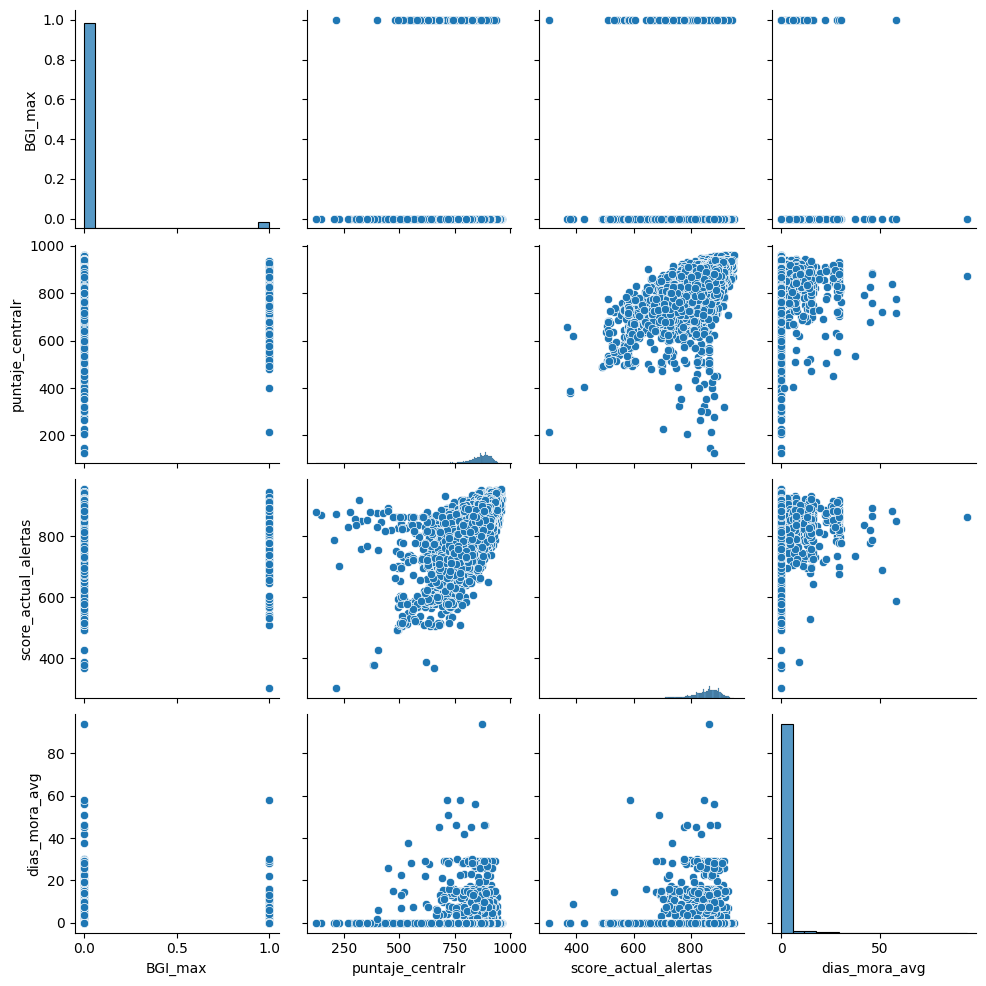

In [35]:
# Selecciona un subconjunto de variables para evitar un gráfico demasiado grande
variables = ['BGI_max', 'puntaje_centralr', 'score_actual_alertas', 'dias_mora_avg']
sns.pairplot(df_final[variables])
plt.show()


In [36]:
variables_dicotomicas = [
    "flag_rod_0_consumo_sum_ult_6meses_sum",
    "flag_score_mantiene_mantiene_alertas",
    "flag_tdc_mejor_clasica_max_centralr",
    "flag_rod_1_consumo_sum_ult_6meses_sum",
    "flag_edad_18_25_centralr",
    "flag_prod_vivienda_max",
    "flag_rod_0_consumo_sum",
    "flag_apertura_consumo_max_ult_9meses_max",
    "flag_apertura_consumo_max_ult_6meses_max",
    "flag_prod_tdc_sum",
    "flag_cartera_vivienda_ult_12meses_sum",
    "aperturas_9meses_activo_max_centralr"
]
df_final[variables_dicotomicas]

,flag_rod_0_consumo_sum_ult_6meses_sum,flag_score_mantiene_mantiene_alertas,flag_tdc_mejor_clasica_max_centralr,flag_rod_1_consumo_sum_ult_6meses_sum,flag_edad_18_25_centralr,flag_prod_vivienda_max,flag_rod_0_consumo_sum,flag_apertura_consumo_max_ult_9meses_max,flag_apertura_consumo_max_ult_6meses_max,flag_prod_tdc_sum,flag_cartera_vivienda_ult_12meses_sum,aperturas_9meses_activo_max_centralr
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1
2,0,1,1,0,0,0,0,0,0,3,0,1
3,0,1,1,0,0,1,0,1,1,2,1,1
4,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23586,0,0,0,0,1,0,0,0,0,1,0,0
23587,0,0,0,0,1,0,0,0,0,1,0,0
23588,0,0,0,0,1,0,0,0,0,1,0,1
23589,0,0,0,0,1,0,0,1,1,2,0,1


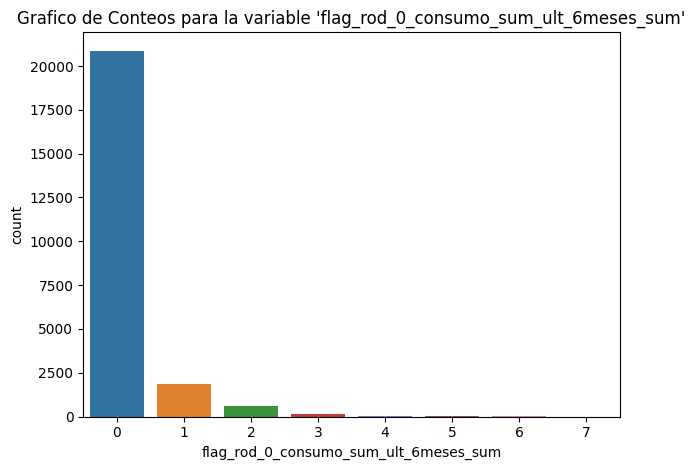

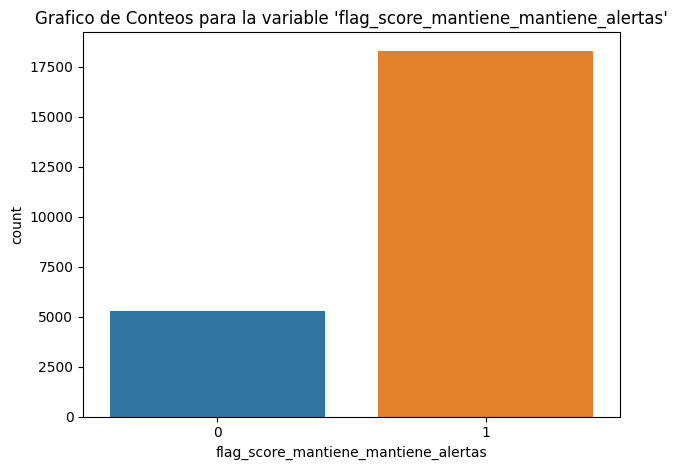

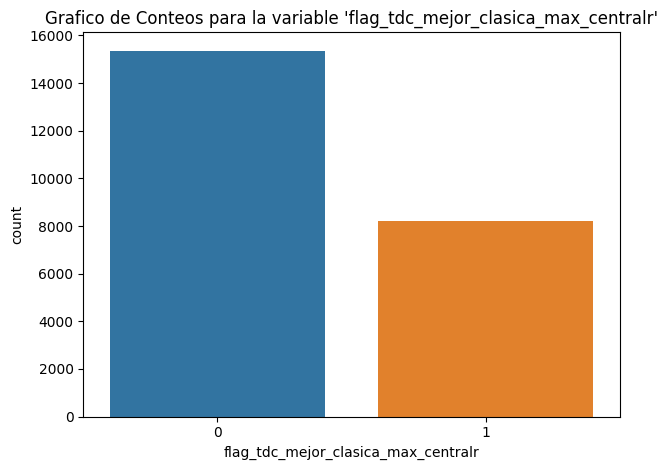

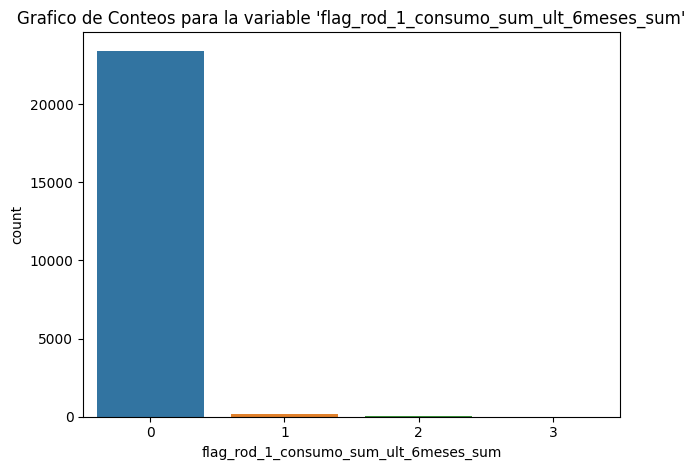

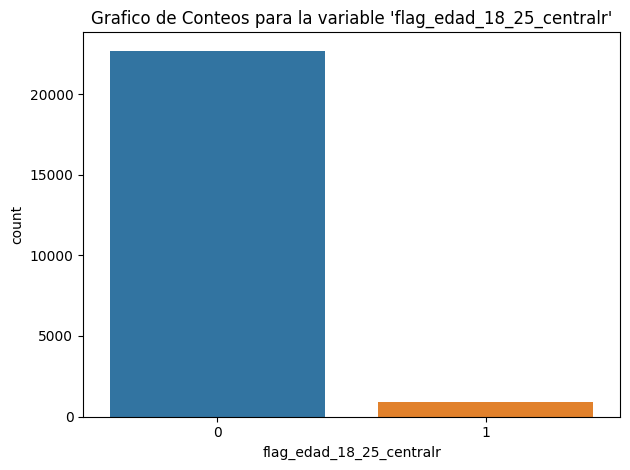

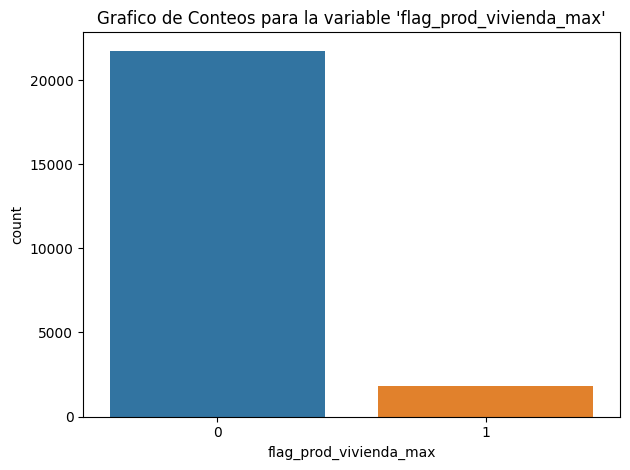

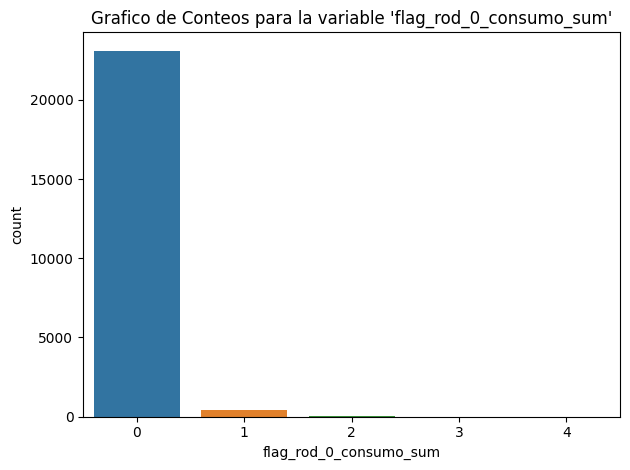

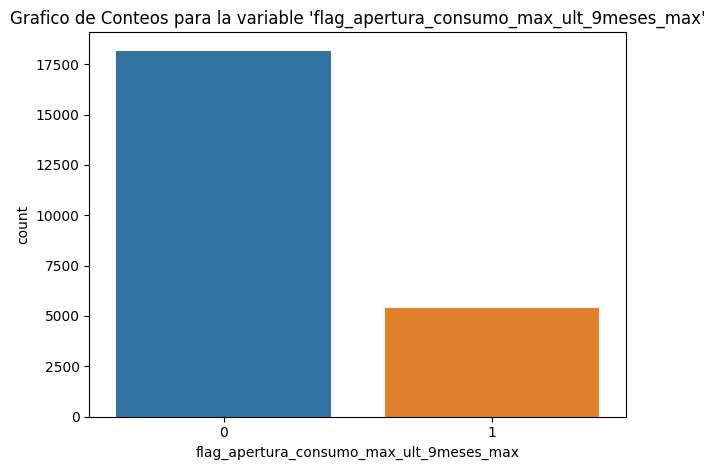

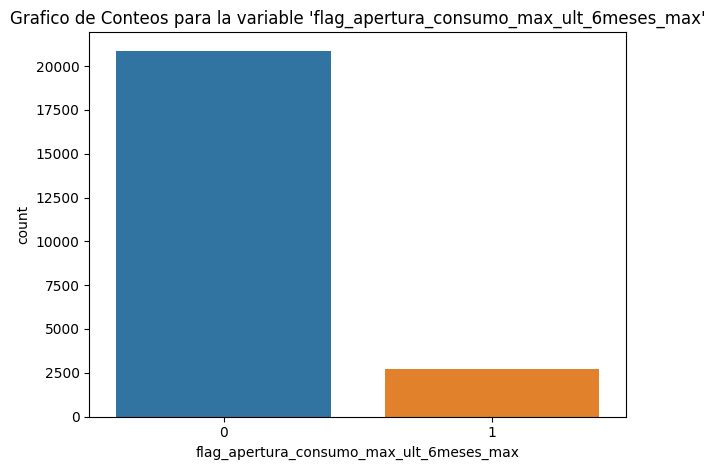

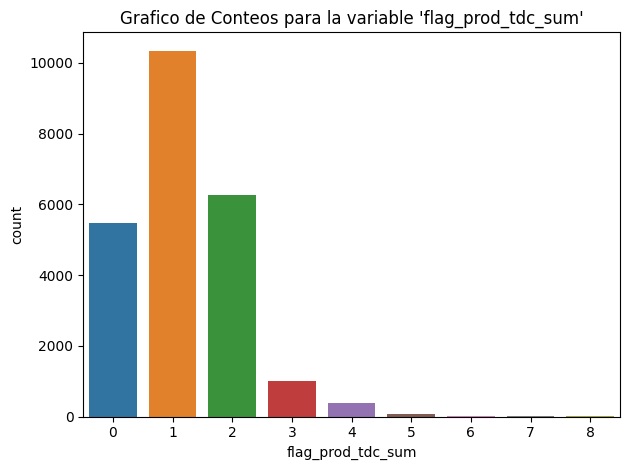

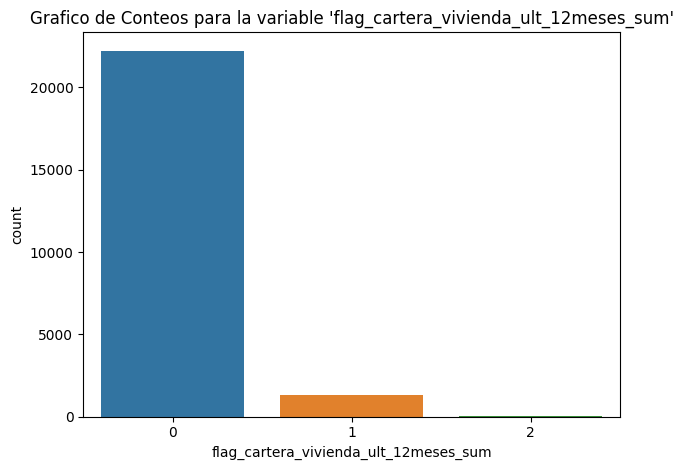

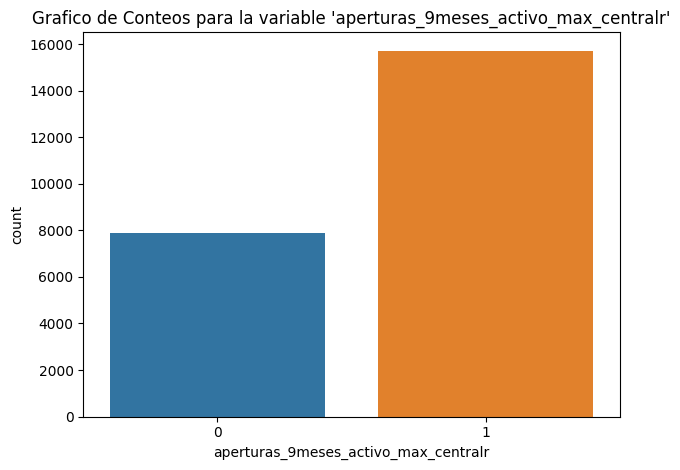

In [46]:
for i in variables_dicotomicas:
  sns.countplot(x = i, data=df_final)
  plt.title(f"Grafico de Conteos para la variable '{i}'")
  plt.tight_layout()
  plt.show()


In [43]:
for i in variables_dicotomicas:
  print(i)
  print(df_final[i].unique())
  print("\n")

flag_rod_0_consumo_sum_ult_6meses_sum
[0 2 1 6 3 4 5 7]


flag_score_mantiene_mantiene_alertas
[0 1]


flag_tdc_mejor_clasica_max_centralr
[0 1]


flag_rod_1_consumo_sum_ult_6meses_sum
[0 1 2 3]


flag_edad_18_25_centralr
[0 1]


flag_prod_vivienda_max
[1 0]


flag_rod_0_consumo_sum
[0 2 1 3 4]


flag_apertura_consumo_max_ult_9meses_max
[0 1]


flag_apertura_consumo_max_ult_6meses_max
[0 1]


flag_prod_tdc_sum
[0 3 2 1 4 6 5 7 8]


flag_cartera_vivienda_ult_12meses_sum
[0 1 2]


aperturas_9meses_activo_max_centralr
[0 1]




In [58]:
df_final2 = pd.get_dummies(df_final, columns=variables_dicotomicas)

## Modelado


En nuestro contexto, el muestreo estratificado es crucial para garantizar que los conjuntos de entrenamiento y prueba reflejen adecuadamente la proporción de clientes que incumplen y los que no. Dado que existe un desequilibrio entre estas clases, el muestreo estratificado asegura que ambas clases estén representadas proporcionalmente en ambos conjuntos. Esto es vital para prevenir el sesgo en el modelo, mejorar su capacidad de generalización y asegurar una evaluación precisa de su rendimiento.

In [48]:
  # Separar las características y la variable objetivo
X = df_final.drop('BGI_max', axis=1)
y = df_final['BGI_max']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123,stratify=y)

**Regresion Logistica**

La regresión logística, en el contexto de este análisis, se utiliza para estimar la probabilidad de que un cliente incurra en incumplimiento, basándose en una serie de predictores o características. Este modelo es particularmente adecuado para situaciones donde la variable objetivo es binaria, como es el caso con la variable 'BGI_max', que indica si un cliente ha incumplido o no.

Funciona calculando las probabilidades de que la variable dependiente pertenezca a una clase específica. En este caso, el modelo asigna una probabilidad de incumplimiento a cada cliente. Estas probabilidades son el resultado de aplicar la función logística a una combinación lineal de las características del cliente. La función logística, que es una S-curve, transforma cualquier valor de entrada en un valor entre 0 y 1, lo que es ideal para representar probabilidades.

Los resultados del modelo se interpretan en términos de estas probabilidades. Por ejemplo, si un cliente tiene una probabilidad de 0.7 según el modelo, significa que, según las características y patrones aprendidos del conjunto de datos, hay un 70% de probabilidad de que este cliente incurra en incumplimiento. Esto es útil para la toma de decisiones, como la evaluación de riesgos o la aprobación de créditos.

Para optimizar el rendimiento del modelo, se llevó a cabo una búsqueda exhaustiva de los mejores hiperparámetros utilizando GridSearchCV. Los hiperparámetros considerados incluyeron diferentes valores para 'C', que controla la fuerza de la regularización, y 'solver', que es el algoritmo utilizado para la optimización. La regularización ayuda a prevenir el sobreajuste, asegurando que el modelo no sea demasiado complejo. El parámetro 'C' juega un papel crucial aquí: valores más bajos significan más regularización. El uso de 'class_weight='balanced'' fue esencial para manejar el desequilibrio en las clases de los datos.

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.feature_selection import RFECV




In [61]:
# Primero, encontrar los mejores hiperparámetros con GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
log_reg = LogisticRegression(class_weight='balanced')
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
log_reg_cv.fit(X_train, y_train)

# Mejores parámetros
best_params = log_reg_cv.best_params_
print("Mejores parámetros: ", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mejores parámetros:  {'C': 100, 'solver': 'liblinear'}


In [62]:
# Ahora, usar estos parámetros en una nueva instancia de LogisticRegression
log_reg_optimized = LogisticRegression(**best_params, class_weight='balanced')

# Aplicar RFECV para la selección de características
selector = RFECV(log_reg_optimized, step=1, cv=5, scoring='roc_auc')
selector.fit(X_train, y_train)

RFECV(cv=5,
      estimator=LogisticRegression(C=100, class_weight='balanced',
                                   solver='liblinear'),
      scoring='roc_auc')

In [63]:
# Entrenar el modelo con las mejores características
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
log_reg_optimized.fit(X_train_selected, y_train)

LogisticRegression(C=100, class_weight='balanced', solver='liblinear')

In [64]:
from sklearn.metrics import roc_auc_score

# Evaluación en el conjunto de entrenamiento
train_auc = roc_auc_score(y_train, log_reg_optimized.predict_proba(X_train_selected)[:, 1])

# Evaluación en el conjunto de prueba
test_auc = roc_auc_score(y_test, log_reg_optimized.predict_proba(X_test_selected)[:, 1])

print(f"ROC AUC en entrenamiento: {train_auc}")
print(f"ROC AUC en prueba: {test_auc}")

ROC AUC en entrenamiento: 0.735332976654919
ROC AUC en prueba: 0.7277566178419554


In [65]:
from sklearn.metrics import classification_report

# Predicciones en el conjunto de prueba
y_pred = log_reg_optimized.predict(X_test_selected)

# Informe de clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.69      0.81      4567
           1       0.07      0.66      0.12       152

    accuracy                           0.69      4719
   macro avg       0.53      0.68      0.47      4719
weighted avg       0.95      0.69      0.79      4719



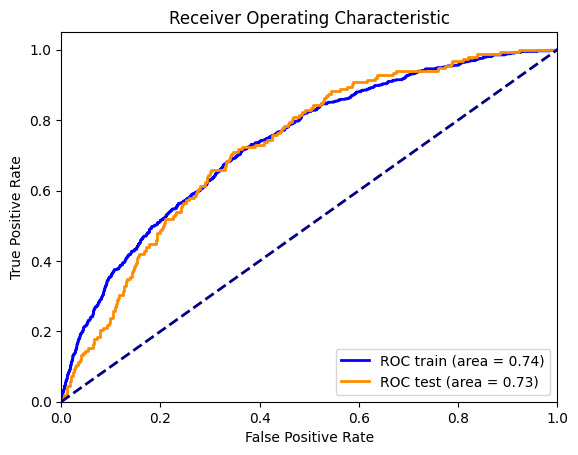

In [66]:


# Calcular las probabilidades predichas para el conjunto de entrenamiento
y_train_pred_proba = log_reg_optimized.predict_proba(X_train_selected)

# Calcular las probabilidades predichas para el conjunto de prueba
y_test_pred_proba = log_reg_optimized.predict_proba(X_test_selected)


# Calcular las métricas para la Curva ROC para el conjunto de entrenamiento
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# Calcular las métricas para la Curva ROC para el conjunto de prueba
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# Graficar la Curva ROC
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC train (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC test (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Interpretacion de Resultados de Regresion Logistica**

Se observó que el modelo de Regresión Logística, tras su optimización con los hiperparámetros seleccionados, alcanzó un rendimiento diferenciado en los conjuntos de entrenamiento y prueba. Específicamente, el modelo mostró un área bajo la curva ROC (AUC-ROC) de aproximadamente 0.735 en el conjunto de entrenamiento, lo que indica una capacidad razonable para distinguir entre las clases. En el conjunto de prueba, el AUC-ROC fue ligeramente inferior, alrededor de 0.728, sugiriendo que el modelo mantiene una capacidad de generalización aceptable.

En cuanto a las métricas de clasificación, se destacó que el modelo tuvo una precisión del 98% en la predicción de la clase mayoritaria (clase 0), pero solo un 7% en la clase minoritaria (clase 1). Este desequilibrio en la precisión refleja la naturaleza desbalanceada de los datos. Sin embargo, en términos de recall, el modelo logró identificar correctamente el 69% de los casos de la clase mayoritaria y el 66% de la clase minoritaria. Esto indica una capacidad relativamente equilibrada del modelo para detectar ambas clases, aunque con una tendencia a clasificar erróneamente algunos casos de la clase mayoritaria como pertenecientes a la clase minoritaria.

El F1-score, que es el promedio armónico entre precisión y recall, fue de 0.81 para la clase mayoritaria y de 0.12 para la clase minoritaria. Estos valores reflejan la dificultad del modelo para equilibrar precisión y recall, especialmente en la clase minoritaria, lo cual es un desafío común en conjuntos de datos desbalanceados.

En términos de precisión global, el modelo alcanzó aproximadamente un 69% de exactitud, lo que indica que acertó en el 69% de todas sus predicciones. Sin embargo, al observar las métricas promediadas (macro y ponderadas), se revela una imagen más matizada del rendimiento del modelo, destacando los desafíos inherentes al trabajar con datos desbalanceados y la importancia de considerar múltiples métricas para evaluar el rendimiento del modelo en tales contextos.






**XGBoost Classifier**

XGBoost, que significa eXtreme Gradient Boosting, es una implementación avanzada y eficiente del algoritmo de boosting de gradientes. Es conocido por su velocidad y rendimiento.


XGBoost funciona construyendo secuencialmente un conjunto de árboles de decisión, donde cada árbol nuevo intenta corregir los errores cometidos por los árboles anteriores. En cada etapa, se añade un nuevo árbol que predice los residuos o errores del conjunto de árboles anterior, refinando continuamente las predicciones. Este proceso se conoce como boosting de gradientes, donde "gradiente" se refiere al uso de un algoritmo de descenso de gradiente para minimizar la pérdida al añadir nuevos modelos

* n_estimators: Número de árboles de decisión a construir. Más árboles pueden mejorar el rendimiento pero también aumentan el riesgo de sobreajuste.
* learning_rate: Tasa de aprendizaje que controla la contribución de cada árbol en la predicción final. Valores más bajos evitan el sobreajuste pero requieren más árboles.
* max_depth: Profundidad máxima de cada árbol. Limita el número de nodos en el árbol. Profundidades más grandes permiten al modelo aprender relaciones más complejas, pero pueden causar sobreajuste.
* scale_pos_weight: Ponderación de las clases positivas en datos desbalanceados. Ayuda a equilibrar la influencia de las clases minoritarias y mayoritarias.



In [67]:
from xgboost import XGBClassifier

In [68]:
class_counts = np.bincount(y_train)
scale_pos_weight = class_counts[0] / class_counts[1]
print(scale_pos_weight)

29.937704918032786


In [69]:
# Primero, encontrar los mejores hiperparámetros con GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
model = XGBClassifier(scale_pos_weight=scale_pos_weight)  # Ajusta el parámetro scale_pos_weight para clases desbalanceadas
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=4, n_es

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [70]:
  # Mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros: ", best_params)

Mejores parámetros:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [71]:
# Ahora, usar estos parámetros en una nueva instancia de XGBClassifier
xgb_optimized = XGBClassifier(**best_params, scale_pos_weight=scale_pos_weight)

# Aplicar RFECV para la selección de características
selector = RFECV(xgb_optimized, step=1, cv=3, scoring='roc_auc')
selector.fit(X_train, y_train)

# Entrenar el modelo con las mejores características
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
xgb_optimized.fit(X_train_selected, y_train)

# # Obtener las probabilidades
# y_pred_proba = xgb_optimized.predict_proba(X_test_selected)

# # Calcular AUC
# auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
# print("AUC: ", auc_score)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
# Evaluación en el conjunto de entrenamiento
y_train_pred_proba = xgb_optimized.predict_proba(X_train_selected)[:, 1]
train_auc = roc_auc_score(y_train, y_train_pred_proba)
print(f"AUC en entrenamiento: {train_auc}")

# Evaluación en el conjunto de prueba
y_test_pred_proba = xgb_optimized.predict_proba(X_test_selected)[:, 1]
test_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"AUC en prueba: {test_auc}")

AUC en entrenamiento: 0.772128813571494
AUC en prueba: 0.7067283313934059


In [73]:
# Informe de clasificación en el conjunto de prueba
y_pred = xgb_optimized.predict(X_test_selected)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.65      0.78      4567
           1       0.06      0.66      0.11       152

    accuracy                           0.65      4719
   macro avg       0.52      0.66      0.45      4719
weighted avg       0.95      0.65      0.76      4719



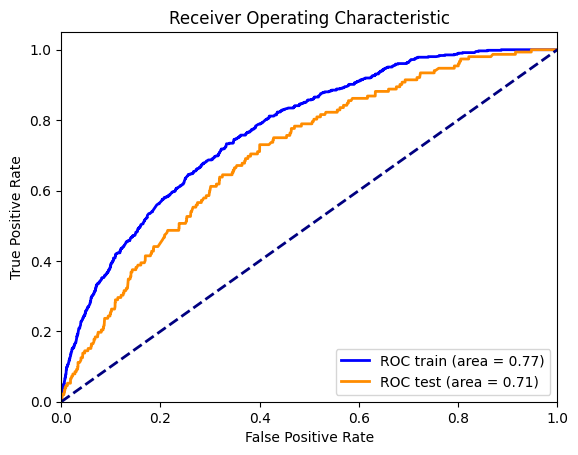

In [74]:
# Calcular las probabilidades predichas para el conjunto de entrenamiento
y_train_pred_proba = xgb_optimized.predict_proba(X_train_selected)[:, 1]

# Calcular las probabilidades predichas para el conjunto de prueba
y_test_pred_proba = xgb_optimized.predict_proba(X_test_selected)[:, 1]

# Calcular las métricas para la Curva ROC para el conjunto de entrenamiento
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Calcular las métricas para la Curva ROC para el conjunto de prueba
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Graficar la Curva ROC
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'ROC train (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC test (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Interpretacion de Resultados para XGBoost**

Se observó que el Área Bajo la Curva (AUC) para el conjunto de entrenamiento fue de 0.7721, lo que indica una buena capacidad del modelo para distinguir entre las clases en este conjunto. Sin embargo, para el conjunto de prueba, el AUC disminuyó a 0.7067, sugiriendo una disminución en la capacidad de generalización del modelo cuando se enfrenta a nuevos datos.

En cuanto a las métricas de clasificación, se reportó que la precisión para la clase 0 (no incumplimiento) fue alta, con un 98%, pero la tasa de verdaderos positivos (recall) fue solo del 65%. Esto significa que, aunque el modelo es muy preciso en la identificación de los no incumplimientos, tiende a perder una cantidad significativa de estos casos. Por otro lado, para la clase 1 (incumplimiento), la precisión fue notablemente baja, con un 6%, pero el recall fue alto, alcanzando el 66%. Esto indica que, aunque el modelo identifica una proporción considerable de los casos de incumplimiento, lo hace con una alta tasa de falsos positivos.

La puntuación F1, que es una medida balanceada de precisión y recall, fue de 0.78 para la clase 0 y de 0.11 para la clase 1. Estos resultados reflejan un desempeño desigual del modelo entre las dos clases, siendo mucho más efectivo en identificar los no incumplimientos que los incumplimientos.

En términos de precisión general (accuracy), el modelo alcanzó un 65%, lo que puede considerarse moderado. Sin embargo, las puntuaciones promedio macro y ponderadas fueron de 0.45 y 0.76, respectivamente, lo que sugiere que, aunque el modelo tiene un buen desempeño general en términos de precisión, su capacidad para manejar el desequilibrio entre las clases es limitada.

**lightGBM Classifier**

LightGBM (Light Gradient Boosting Machine) es un algoritmo de aprendizaje automático basado en gradient boosting que se destaca por su eficiencia en el manejo de grandes volúmenes de datos y su alta velocidad de procesamiento. Es especialmente útil en contextos donde se requiere un procesamiento rápido y eficiente de grandes conjuntos de datos con muchas características.

En el contexto de clases desbalanceadas, LightGBM ofrece parámetros como scale_pos_weight y is_unbalance para ajustar el modelo a este tipo de datos. Estos parámetros ayudan a equilibrar la influencia de las clases minoritarias y mayoritarias durante el entrenamiento.

In [75]:
# Calcula el peso para la clase positiva
class_counts = np.bincount(y_train)
scale_pos_weight = class_counts[0] / class_counts[1]
print("Scale pos weight:", scale_pos_weight)


Scale pos weight: 29.937704918032786


In [76]:
from lightgbm import LGBMClassifier

# Definir el modelo
model = LGBMClassifier(scale_pos_weight=scale_pos_weight)

# Definir los parámetros para Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'num_leaves': [31, 50, 70]
}

# Grid Search con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)

# Mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros: ", best_params)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [77]:
# Ahora, usar estos parámetros en una nueva instancia de LGBMClassifier
lgbm_optimized = LGBMClassifier(**best_params)

# Aplicar RFECV para la selección de características
selector = RFECV(lgbm_optimized, step=1, cv=3, scoring='roc_auc')
selector.fit(X_train, y_train)

# Entrenar el modelo con las mejores características
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
lgbm_optimized.fit(X_train_selected, y_train)

# # Obtener las probabilidades
# y_pred_proba = lgbm_optimized.predict_proba(X_test_selected)

# # Calcular AUC
# auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
# print("AUC: ", auc_score)

[LightGBM] [Info] Number of positive: 407, number of negative: 12174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Number of data points in the train set: 12581, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032350 -> initscore=-3.398245
[LightGBM] [Info] Start training from score -3.398245
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 407, number of negative: 12174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of t

LGBMClassifier(learning_rate=0.01, max_depth=3)

In [78]:
# Evaluación en el conjunto de entrenamiento
y_train_pred_proba = lgbm_optimized.predict_proba(X_train_selected)[:, 1]
train_auc = roc_auc_score(y_train, y_train_pred_proba)
print(f"AUC en entrenamiento: {train_auc}")

# Evaluación en el conjunto de prueba
y_test_pred_proba = lgbm_optimized.predict_proba(X_test_selected)[:, 1]
test_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"AUC en prueba: {test_auc}")

AUC en entrenamiento: 0.7480336755890131
AUC en prueba: 0.6990884261233332


In [79]:
# Informe de clasificación en el conjunto de prueba
y_pred = lgbm_optimized.predict(X_test_selected)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4567
           1       0.00      0.00      0.00       152

    accuracy                           0.97      4719
   macro avg       0.48      0.50      0.49      4719
weighted avg       0.94      0.97      0.95      4719



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


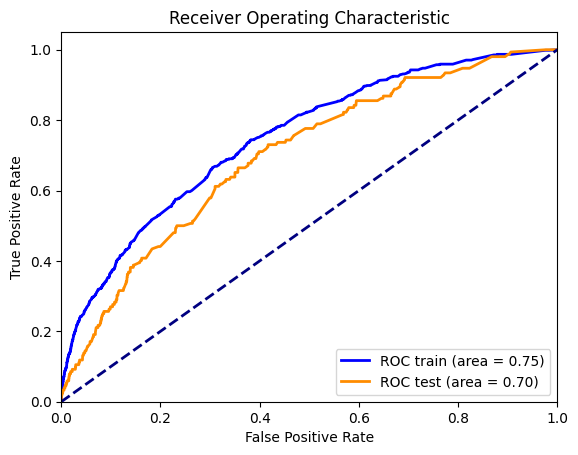

In [80]:
# Calcular las probabilidades predichas para el conjunto de entrenamiento
y_train_pred_proba = lgbm_optimized.predict_proba(X_train_selected)[:, 1]

# Calcular las probabilidades predichas para el conjunto de prueba
y_test_pred_proba = lgbm_optimized.predict_proba(X_test_selected)[:, 1]

# Calcular las métricas para la Curva ROC para el conjunto de entrenamiento
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Calcular las métricas para la Curva ROC para el conjunto de prueba
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Graficar la Curva ROC
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'ROC train (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC test (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Interpretacion Resultados Modelo de lightGBM**

Se observó que el Área Bajo la Curva (AUC) para el conjunto de entrenamiento fue de 0.7480, lo que indica una buena capacidad del modelo para distinguir entre las clases en este conjunto. Sin embargo, para el conjunto de prueba, el AUC disminuyó a 0.6991, sugiriendo una disminución en la capacidad de generalización del modelo cuando se enfrenta a nuevos datos.

En cuanto a las métricas de clasificación, se reportó que la precisión y el recall para la clase 0 (no incumplimiento) fueron muy altos, con valores cercanos al 100%. Esto significa que el modelo es muy eficaz en la identificación de los no incumplimientos. Por otro lado, para la clase 1 (incumplimiento), tanto la precisión como el recall fueron de 0.00%, indicando que el modelo no pudo identificar correctamente ningún caso de incumplimiento. Esto es preocupante, especialmente si el objetivo es detectar incumplimientos.

La puntuación F1, que es una medida balanceada de precisión y recall, fue prácticamente perfecta para la clase 0, pero de 0.00% para la clase 1. Estos resultados reflejan un desempeño muy desigual del modelo entre las dos clases, siendo efectivo en identificar los no incumplimientos pero completamente ineficaz en detectar los incumplimientos.

En términos de precisión general (accuracy), el modelo alcanzó un 97%, lo que puede parecer alto, pero es engañoso debido al desequilibrio de clases en los datos. Las puntuaciones promedio macro y ponderadas fueron de 0.48 y 0.94, respectivamente, lo que sugiere que, aunque el modelo tiene un buen desempeño general en términos de precisión, su capacidad para manejar el desequilibrio entre las clases es muy limitada, especialmente en la detección de incumplimientos.






**CatBoost Classifier**

CatBoost es un algoritmo de aprendizaje automático que se especializa en trabajar con datos categóricos y es conocido por su eficiencia y precisión. Es particularmente útil en contextos donde los datos tienen muchas características categóricas, como en nuestro caso.

El algoritmo utiliza gradient boosting, una técnica que construye modelos de forma secuencial, donde cada nuevo modelo se enfoca en corregir los errores cometidos por los modelos anteriores. CatBoost mejora este proceso mediante el uso de un esquema de codificación especial para las variables categóricas, lo que reduce el riesgo de overfitting y mejora la precisión del modelo.

Los parámetros clave de CatBoost incluyen:

* Iterations: Número de árboles a construir (similar a n_estimators en otros algoritmos de boosting).
* Learning Rate: Controla la velocidad de aprendizaje del modelo.
* Depth: Profundidad de los árboles utilizados en el modelo.
L2_leaf_reg: Parámetro de regularización L2 en las hojas del árbol.

Además, CatBoost ofrece opciones para manejar datos desbalanceados, como el parámetro scale_pos_weight, que ayuda a equilibrar la influencia de las clases minoritarias y mayoritarias durante el entrenamiento.

In [81]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.4 MB/s eta 0:00:00


In [82]:
# Calcular el peso de la clase positiva
class_counts = np.bincount(y_train)
scale_pos_weight = class_counts[0] / class_counts[1]

In [83]:
from catboost import CatBoostClassifier

# Definir el modelo
model = CatBoostClassifier(verbose=0, scale_pos_weight=scale_pos_weight)

# Definir los parámetros para Grid Search
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8]
}

# Grid Search con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ........depth=4, iterations=100, learning_rate=0.01; total time=   2.7s
[CV] END ........depth=4, iterations=100, learning_rate=0.01; total time=   0.7s
[CV] END ........depth=4, iterations=100, learning_rate=0.01; total time=   1.5s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   2.4s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   2.1s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   2.1s
[CV] END .........depth=4, iterations=100, learning_rate=0.2; total time=   1.4s
[CV] END .........depth=4, iterations=100, learning_rate=0.2; total time=   1.1s
[CV] END .........depth=4, iterations=100, learning_rate=0.2; total time=   1.4s
[CV] END ........depth=4, iterations=200, learning_rate=0.01; total time=   2.4s
[CV] END ........depth=4, iterations=200, learning_rate=0.01; total time=   2.4s
[CV] END ........depth=4, iterations=200, learni

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7b86f8d08220>,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.1, 0.2]},
             scoring='roc_auc', verbose=2)

In [84]:
# Mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros: ", best_params)


Mejores parámetros:  {'depth': 4, 'iterations': 300, 'learning_rate': 0.01}


In [85]:
# Ahora, usar estos parámetros en una nueva instancia de CatBoostClassifier
catboost_optimized = CatBoostClassifier(**best_params, verbose=0)

# Aplicar RFECV para la selección de características
selector = RFECV(catboost_optimized, step=1, cv=3, scoring='roc_auc')
selector.fit(X_train, y_train)

# Entrenar el modelo con las mejores características
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
catboost_optimized.fit(X_train_selected, y_train)

In [86]:
# Evaluación en el conjunto de entrenamiento
y_train_pred_proba = catboost_optimized.predict_proba(X_train_selected)[:, 1]
train_auc = roc_auc_score(y_train, y_train_pred_proba)
print(f"AUC en entrenamiento: {train_auc}")

# Evaluación en el conjunto de prueba
y_test_pred_proba = catboost_optimized.predict_proba(X_test_selected)[:, 1]
test_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"AUC en prueba: {test_auc}")

AUC en entrenamiento: 0.7479209269090524
AUC en prueba: 0.7339322139375151


In [87]:
# Predecir las clases para el conjunto de prueba
y_test_pred = catboost_optimized.predict(X_test_selected)

# Generar y mostrar el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_test_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4567
           1       0.00      0.00      0.00       152

    accuracy                           0.97      4719
   macro avg       0.48      0.50      0.49      4719
weighted avg       0.94      0.97      0.95      4719



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


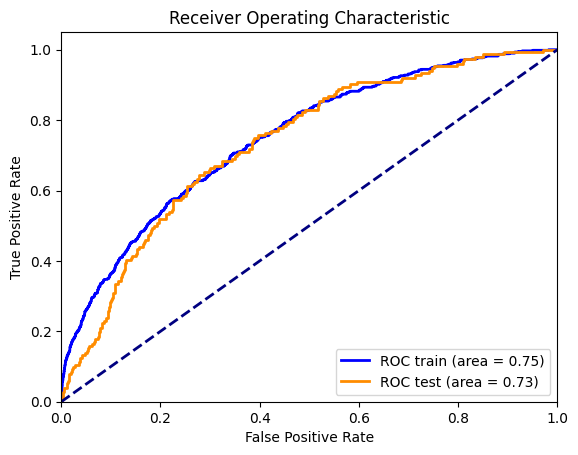

In [88]:
# Calcular las probabilidades predichas para el conjunto de entrenamiento
y_train_pred_proba = catboost_optimized.predict_proba(X_train_selected)[:, 1]

# Calcular las probabilidades predichas para el conjunto de prueba
y_test_pred_proba = catboost_optimized.predict_proba(X_test_selected)[:, 1]

# Calcular las métricas para la Curva ROC para el conjunto de entrenamiento
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Calcular las métricas para la Curva ROC para el conjunto de prueba
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Graficar la Curva ROC
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'ROC train (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC test (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Interpretacion Resultados Modelo de CATBoost**

Se observó que el Área Bajo la Curva (AUC) para el conjunto de entrenamiento fue de 0.7479, lo que indica una capacidad razonable del modelo para distinguir entre las clases en este conjunto. Sin embargo, para el conjunto de prueba, el AUC disminuyó ligeramente a 0.7339, sugiriendo una pequeña disminución en la capacidad de generalización del modelo cuando se enfrenta a nuevos datos.

En cuanto a las métricas de clasificación, se reportó que la precisión y el recall para la clase 0 (no incumplimiento) fueron extremadamente altos, alcanzando casi el 100%. Esto significa que el modelo es muy eficaz en la identificación de los casos donde no hay incumplimiento. Por otro lado, para la clase 1 (incumplimiento), tanto la precisión como el recall fueron de 0.00%, lo que indica que el modelo no logró identificar correctamente ningún caso de incumplimiento. Esta situación es particularmente problemática si el objetivo principal del modelo es detectar estos incumplimientos.

La puntuación F1, que combina precisión y recall en una única métrica, fue casi perfecta para la clase 0, pero de 0.00% para la clase 1. Estos resultados muestran un rendimiento muy desigual del modelo entre las dos clases, siendo altamente efectivo en identificar los no incumplimientos, pero completamente ineficaz en la detección de incumplimientos.

En términos de precisión general (accuracy), el modelo alcanzó un 97%, lo cual podría parecer impresionante a primera vista. Sin embargo, este número es engañoso debido al fuerte desequilibrio de clases en los datos. Las puntuaciones promedio macro y ponderadas fueron de 0.48 y 0.94, respectivamente. Estos valores sugieren que, aunque el modelo tiene un buen desempeño general en términos de precisión, su habilidad para manejar el desequilibrio entre las clases es muy limitada, particularmente en lo que respecta a la detección de incumplimientos.







**AdaBoost Classifier**

AdaBoost, o "Adaptive Boosting", es un algoritmo de aprendizaje automático utilizado para mejorar la precisión de los modelos de clasificación. Funciona combinando múltiples modelos simples, conocidos como "weak learners", para formar un modelo más robusto y preciso.

El proceso comienza asignando pesos iguales a todas las observaciones del conjunto de datos. En cada iteración, AdaBoost entrena un nuevo weak learner, ajusta los pesos de las observaciones en función de los errores del modelo actual, y aumenta el peso de las observaciones mal clasificadas. Esto hace que los modelos subsiguientes se enfoquen más en los casos difíciles.

Los parámetros clave incluyen el tipo de weak learner (generalmente un árbol de decisión simple), el número de weak learners a entrenar (n_estimators), y la tasa de aprendizaje, que ajusta la contribución de cada weak learner al modelo final.

AdaBoost combina todos los weak learners entrenados, dando más peso a los más precisos, para formar el modelo final. Este enfoque iterativo y adaptativo hace que AdaBoost sea efectivo en mejorar la precisión y resistente al overfitting, especialmente con weak learners simples.

In [89]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Calcular el peso de las clases
class_weights = {0: y_train.value_counts()[1] / len(y_train),
                 1: y_train.value_counts()[0] / len(y_train)}

# Definir el modelo base para AdaBoost con pesos de clase
base_estimator = DecisionTreeClassifier(max_depth=1, class_weight=class_weights)

# Definir el modelo AdaBoost
model = AdaBoostClassifier(base_estimator=base_estimator)

# Definir los parámetros para Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Grid Search con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)

# Mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros: ", best_params)



Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...................learning_rate=1, n_estimators=50; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...................learning_rate=1, n_estimators=50; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...................learning_rate=1, n_estimators=50; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mejores parámetros:  {'learning_rate': 0.1, 'n_estimators': 50}


In [90]:
# Usar los mejores parámetros en una nueva instancia de AdaBoostClassifier
adaboost_optimized = AdaBoostClassifier(**best_params, base_estimator=base_estimator)

# Aplicar RFECV para la selección de características
selector = RFECV(adaboost_optimized, step=1, cv=3, scoring='roc_auc')
selector.fit(X_train, y_train)

# Identificar las características seleccionadas
selected_features = X_train.columns[selector.support_]

# Entrenar el modelo con las mejores características
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
adaboost_optimized.fit(X_train_selected, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.03232301822806274,
                                                                       1: 0.9676769817719373},
                                                         max_depth=1),
                   learning_rate=0.1)

In [91]:
# Evaluación en el conjunto de entrenamiento
y_train_pred_proba = adaboost_optimized.predict_proba(X_train_selected)[:, 1]
train_auc = roc_auc_score(y_train, y_train_pred_proba)
print(f"AUC en entrenamiento: {train_auc}")

# Evaluación en el conjunto de prueba
y_test_pred_proba = adaboost_optimized.predict_proba(X_test_selected)[:, 1]
test_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"AUC en prueba: {test_auc}")

AUC en entrenamiento: 0.731958595381254
AUC en prueba: 0.7062774422919571


In [92]:
# Predecir las clases para el conjunto de prueba
y_test_pred = adaboost_optimized.predict(X_test_selected)

# Generar y mostrar el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_test_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.64      0.78      4567
           1       0.06      0.68      0.11       152

    accuracy                           0.64      4719
   macro avg       0.52      0.66      0.44      4719
weighted avg       0.95      0.64      0.76      4719



**Interpretacion del Modelo AdaBoost**

El modelo AdaBoost alcanzó un Área Bajo la Curva (AUC) de 0.7319 en el conjunto de entrenamiento, lo que indica una capacidad razonable para distinguir entre las clases en este conjunto. Sin embargo, el AUC disminuyó a 0.7063 en el conjunto de prueba, lo que sugiere una disminución en la capacidad de generalización del modelo al enfrentarse a nuevos datos.

En cuanto a las métricas de clasificación, se destacó que la precisión para la clase 0 (no incumplimiento) fue alta, con un 98%, pero el recall fue significativamente más bajo, con un 64%. Esto indica que, aunque el modelo es preciso en la identificación de los no incumplimientos, tiende a perder una cantidad considerable de estos casos. Por otro lado, para la clase 1 (incumplimiento), la precisión fue baja, con un 6%, pero el recall fue notablemente alto, alcanzando el 68%. Esto sugiere que el modelo es capaz de identificar una proporción considerable de los casos de incumplimiento, aunque con una alta tasa de falsos positivos.

La puntuación F1, que equilibra la precisión y el recall, fue de 0.78 para la clase 0 y de 0.11 para la clase 1. Estos resultados reflejan un desempeño desigual del modelo entre las dos clases, siendo más efectivo en identificar los no incumplimientos que los incumplimientos.

En términos de precisión general (accuracy), el modelo logró un 64%, lo que puede considerarse moderado. Las puntuaciones promedio macro y ponderadas fueron de 0.52 y 0.95, respectivamente, lo que indica que, aunque el modelo tiene un rendimiento general aceptable en términos de precisión, su capacidad para manejar el desequilibrio entre las clases es limitada.

## Evaluacion

| Modelo                | AUC Entrenamiento | AUC Prueba | F1 Score Clase 0 | F1 Score Clase 1 | Precision Clase 0 | Precision Clase 1 | Recall Clase 0 | Recall Clase 1 | Accuracy | Macro Avg F1 | Weighted Avg F1 |
|-----------------------|-------------------|------------|------------------|------------------|-------------------|-------------------|----------------|----------------|----------|--------------|-----------------|
| Regresión Logística   | 0.7353            | 0.7278     | 0.81             | 0.12             | 0.98              | 0.07              | 0.69           | 0.66           | 0.69     | 0.47         | 0.79            |
| XGBoost Classifier    | 0.7721            | 0.7067     | 0.78             | 0.11             | 0.98              | 0.06              | 0.65           | 0.66           | 0.65     | 0.45         | 0.76            |
| LightGBM Classifier   | 0.7480            | 0.6991     | 0.98             | 0.00             | 0.97              | 0.00              | 1.00           | 0.00           | 0.97     | 0.49         | 0.95            |
| CatBoost Classifier   | 0.7479            | 0.7339     | 0.98             | 0.00             | 0.97              | 0.00              | 1.00           | 0.00           | 0.97     | 0.49         | 0.95            |
| AdaBoost Classifier   | 0.7320            | 0.7063     | 0.78             | 0.11             | 0.98              | 0.06              | 0.64           | 0.68           | 0.64     | 0.44         | 0.76            |


* El AUC, o Área Bajo la Curva ROC, esta métrica mide la capacidad del modelo para distinguir entre clases. Un valor más alto indica una mejor capacidad de discriminación, siendo 1.0 el óptimo.

* La precisión se refiere a la proporción de identificaciones positivas que fueron realmente correctas. Es especialmente útil cuando el costo de los falsos positivos es alto. El recall, por otro lado, mide la proporción de positivos reales que fueron identificados correctamente. Es crucial cuando es importante no perder positivos reales.

* El F1 Score es una medida que combina precisión y recall en un solo número, proporcionando un equilibrio entre ambos. Es particularmente útil en situaciones donde hay un desequilibrio de clases, como en este caso, donde los incumplimientos son mucho menos comunes que los no incumplimientos.

* El promedio macro (macro avg) calcula la métrica (por ejemplo, precisión, recall, F1-score) independientemente para cada clase y luego toma el promedio de estas métricas, tratando a todas las clases por igual. Esto significa que cada clase contribuye por igual al promedio final, independientemente de su tamaño. En contextos donde todas las clases son igualmente importantes, el promedio macro es una buena medida. Sin embargo, puede ser engañoso en situaciones de desequilibrio de clases, ya que las clases minoritarias tienen tanto peso en el promedio como las clases mayoritarias.

* El promedio ponderado (weighted avg) también calcula la métrica para cada clase, pero al tomar el promedio, pondera la contribución de cada clase por su tamaño (número de instancias en la clase).Esto significa que las clases con más instancias tienen un mayor impacto en el promedio final. En contextos con desequilibrio de clases, el promedio ponderado puede ser más representativo del rendimiento real del modelo, ya que refleja la importancia proporcional de cada clase.

* La precisión general, o accuracy, mide la proporción de predicciones correctas (tanto positivas como negativas) en relación con el total de casos. Sin embargo, puede ser engañosa en conjuntos de datos desequilibrados.


## Conclusiones de los Modelos


En el contexto de predecir la probabilidad de incumplimiento de un cliente, es crucial considerar tanto la métrica AUC como las métricas de clasificación para evaluar el rendimiento de los modelos. Dado el desequilibrio de clases en los datos, donde los incumplimientos son menos frecuentes, estas métricas nos proporcionan una visión integral del desempeño de cada modelo.

> Aunque ninguno de los modelos es perfecto, la Regresión Logística, XGBoost y AdaBoost ofrecen un mejor equilibrio entre AUC y recall para la clase de incumplimiento. En un escenario donde es crucial no pasar por alto los incumplimientos, estos modelos son preferibles, a pesar de que esto pueda llevar a un mayor número de falsos positivos. En nuestro contexto, es más prudente equivocarse por exceso en la identificación de posibles incumplimientos que no detectarlos.

1. El Modelo de Regresión Logística muestra un AUC moderadamente alto tanto en entrenamiento como en prueba, indicando una capacidad decente para distinguir entre clases. Aunque su precisión para la clase de incumplimiento es baja, su alto recall sugiere que es capaz de identificar una buena cantidad de incumplimientos reales, aunque a costa de un número significativo de falsos positivos. En nuestro contexto, es preferible errar por exceso en la identificación de posibles incumplimientos, ya que los costos asociados a no detectar un incumplimiento real pueden ser sustanciales.

2. El Modelo XGBoost Classifier, aunque muestra un alto AUC en entrenamiento, su rendimiento disminuye en la prueba, lo que podría indicar sobreajuste. Al igual que la regresión logística, tiene una baja precisión pero un alto recall para la clase de incumplimiento, lo que significa que, aunque identifica muchos incumplimientos reales, también genera muchos falsos positivos. Nuevamente, en nuestro contexto, este enfoque de "mejor prevenir que lamentar" puede ser más beneficioso.

3. El Modelo LightGBM Classifier y el Modelo CatBoost Classifier, a pesar de tener buenos AUC, fallan notablemente en identificar incumplimientos, mostrando una muy baja precisión y recall para esta clase. Esto los hace menos adecuados para nuestro objetivo, ya que es crítico detectar la mayoría de los incumplimientos reales, incluso si esto implica aceptar un mayor número de falsos positivos.

4. El Modelo AdaBoost Classifier presenta un equilibrio moderado en términos de AUC y un alto recall para la clase de incumplimiento, similar a la regresión logística y XGBoost. Aunque su precisión es baja, su capacidad para identificar incumplimientos es valiosa en nuestro contexto, donde el costo de no detectar un incumplimiento real puede ser significativo.

5. El modelo CatBoost Classifier muestra un AUC Consistentemente bueno tanto en entrenamiento como en prueba, pero para el Precisión y Recall para la clase 1, es Muy baja similar a LightGBM. A pesar de un buen AUC, el modelo no logra identificar efectivamente los incumplimientos.